In [1]:
%matplotlib inline

# import

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas as pd
import plotly_express as px
import matplotlib.pyplot as plt

from scipy.stats import spearmanr#
from scipy.stats.stats import pearsonr

import pandas as pd
from astropy import constants
from astropy import units as u
from astropy import units

from matplotlib.pyplot import MultipleLocator



import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter


from datetime import timedelta, datetime
import numpy as np
from astropy.time import Time
from bubbly.bubbly import bubbleplot 
import plotly_express as px
from bubbly.bubbly import bubbleplot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()
import plotly
import plotly.graph_objs as go
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)


from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np
from astropy.io import ascii
import matplotlib.colors as colors


# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, CategoricalColorMapper, NumeralTickFormatter,BasicTickFormatter
from bokeh.layouts import gridplot
from bokeh.models import Axis
# Bokeh libraries
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import column
# Bokeh Library
from bokeh.models.widgets import Tabs, Panel
from bokeh.models import HoverTool
import matplotlib.pyplot as plt

from astropy import constants
from astropy import units as u
from astropy import units




# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, CategoricalColorMapper, NumeralTickFormatter,BasicTickFormatter
from bokeh.layouts import gridplot
from bokeh.models import Axis,Range1d
# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, CategoricalColorMapper, NumeralTickFormatter,BasicTickFormatter
from bokeh.layouts import gridplot
from bokeh.models import Axis
from bokeh.models import Axis,Span,Range1d


In [18]:
                                                        
def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()



def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime.datetime(2018, 1, 1))+58119
    return y


def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year)
    """
    y = x + mdates.date2num(datetime.datetime(2018, 1, 1))
    return y


def mjd2date(x):
    y = x + mdates.date2num(datetime.datetime(2007, 1, 1))
    return y

def date2mjd(x):    
    y = x - mdates.date2num(datetime.datetime(2007, 1, 1))+54101
    return y 



def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate

In [23]:
import numpy as np
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.modeling import models,fitting
from astropy.modeling.models import custom_model
import numpy as np
from scipy.optimize import least_squares,curve_fit
from scipy.stats import f
import os

def linear(x,k,b):#linear
    return k*x+b

def broken_linear_curve(x,k1,k2,x0,b1,b2):#two lines divided by x0
    return np.where(x<x0,k1*x+b1,k2*x+b2)    

def broken_linear_curve_dot(x,k1,k2,x0,y0):#connect by x0,y0
    return np.where(x<x0,k1*(x-x0)+y0,k2*(x-x0)+y0) 

def power_law(x,S0,alpha):
    return S0*x**alpha



def alpha_calc(x,y):
    popt,pcov=curve_fit(power_law,x,y,p0=(10,0.5))
    S0=popt[0]
    alpha=popt[1]
    alpha_err=np.sqrt(np.diag(pcov))[1]
    return S0,alpha,alpha_err

def linear_calc(x,y):#linear_parameter
    popt,pcov=curve_fit(linear,x,y,p0=(1,1))
    return popt[0],popt[1]

def broken_linear_curve_calc(x,y):
    param_bounds=([-np.inf,0,-4,-np.inf,-np.inf],[-0,np.inf,-2.0,np.inf,np.inf])
    popt,pcov=curve_fit(broken_linear_curve,x,y,p0=(-1.5,1.5,-2.2,2,-1.5),bounds=param_bounds)
    k1=popt[0]
    k2=popt[1]
    x0=popt[2]
    b1=popt[3]
    b2=popt[4]
    return k1,k2,x0,b1,b2

def broken_linear_curve_dot_calc(x,y):
    param_bounds=([-np.inf,0,-4,-np.inf],[-0,np.inf,-2.0,np.inf])
    popt,pcov=curve_fit(broken_linear_curve_dot,x,y,p0=(-1.5,1.5,-2.2,1),bounds=param_bounds)
    k1=popt[0]
    k2=popt[1]
    x0=popt[2]
    y0=popt[3]
    return k1,k2,x0,y0


def decay_e_timescale(t,tau,S0):
    logey=-t/tau+S0
    return logey
#logy=-(x-x[0])/tau+S0

def decay_e_timescale_calc(x,y,tau_test=1000,S0_test=1):
    logey=np.log(y)
    param_bounds=([0,-np.inf],[np.inf,np.inf])
    popt,pcov=curve_fit(decay_e_timescale,x,logey,p0=(tau_test,S0_test),bounds=param_bounds)
    tau=popt[0]
    S0=popt[1]    
    return tau,S0


def exp_timescale(t,Tr,Tf,tp,S0):
    logey=-(np.exp((tp-t)/Tr)+np.exp((t-tp)/Tf))+S0
    return logey


def exp_timescale_calc(x,y,Tr_test=10000,Tf_test=2000,tp_test=50000,S0_test=1):
    logey=np.log(y)
    param_bounds=([10,10,45700,-np.inf],[np.inf,np.inf,58300,np.inf])
    popt,pcov=curve_fit(exp_timescale,x,logey,p0=(Tr_test,Tf_test,tp_test,S0_test),bounds=param_bounds)
    Tr=popt[0]
    Tf=popt[1]
    tp=popt[2] 
    S0=popt[3]    
    return Tr,Tf,tp,S0


In [3]:
wave1=np.array([2246,3465,2600,1928])# m2,u,w1,w2
extinction_Noda=extinction.fm07(wave1, 0.113, unit='aa')# Noda 2018
print(extinction_Noda)

[0.35475777 0.18014664 0.25066752 0.31093384]


# uvot

In [5]:
uvot_um2=pd.read_csv('/Users/brettlv/python_code/Mrk1018/data/uvot_um2_sum.csv',sep='|',header=0)
uvot_uuu=pd.read_csv('/Users/brettlv/python_code/Mrk1018/data/uvot_uuu_sum.csv',sep='|',header=0)
uvot_uw1=pd.read_csv('/Users/brettlv/python_code/Mrk1018/data/uvot_uw1_sum.csv',sep='|',header=0)
uvot_uw2=pd.read_csv('/Users/brettlv/python_code/Mrk1018/data/uvot_uw2_sum.csv',sep='|',header=0)


#wave1=np.array([2246,3465,2600,1928])# m2,u,w1,w2

f_um2=(constants.c/(2246*units.AA)).to(u.Hz).value
f_uuu=(constants.c/(3465*units.AA)).to(u.Hz).value
f_uw1=(constants.c/(2600*units.AA)).to(u.Hz).value
f_uw2=(constants.c/(1928*units.AA)).to(u.Hz).value


uvot_um2.columns=['0','band','mjd','mag', 'mag_err','mjy', 'mjy_err','rate','rate_err', '9']
uvot_um2['flux']=f_um2*uvot_um2['mjy']*10**(-26)
uvot_um2['band']='um2'
uvot_um2['freq']=f_um2
uvot_um2['f_err']=f_um2*uvot_um2['mjy_err']*10**(-26)

uvot_um2['mag_ext_cor']=uvot_um2['mag']-extinction_Noda[0]
uvot_um2['mjy_ext_cor']=10**((-48.6-uvot_um2['mag_ext_cor'])/2.5+26)
uvot_um2['flux_ext_cor']=f_um2*uvot_um2['mjy_ext_cor']*10**(-26)

uvot_uuu.columns=['0','band','mjd','mag', 'mag_err','mjy', 'mjy_err','rate','rate_err', '9']
uvot_uuu['flux']=f_uuu*uvot_uuu['mjy']*10**(-26)
uvot_uuu['band']='uuu'
uvot_uuu['freq']=f_uuu
uvot_uuu['f_err']=f_uuu*uvot_uuu['mjy_err']*10**(-26)

uvot_uuu['mag_ext_cor']=uvot_uuu['mag']-extinction_Noda[1]
uvot_uuu['mjy_ext_cor']=10**((-48.6-uvot_uuu['mag_ext_cor'])/2.5+26)
uvot_uuu['flux_ext_cor']=f_uuu*uvot_uuu['mjy_ext_cor']*10**(-26)

uvot_uw1.columns=['0','band','mjd','mag', 'mag_err','mjy', 'mjy_err','rate','rate_err', '9']
uvot_uw1['flux']=f_uw1*uvot_uw1['mjy']*10**(-26)
uvot_uw1['band']='uw1'
uvot_uw1['freq']=f_uw1
uvot_uw1['f_err']=f_uw1*uvot_uw1['mjy_err']*10**(-26)

uvot_uw1['mag_ext_cor']=uvot_uw1['mag']-extinction_Noda[2]
uvot_uw1['mjy_ext_cor']=10**((-48.6-uvot_uw1['mag_ext_cor'])/2.5+26)
uvot_uw1['flux_ext_cor']=f_uw1*uvot_uw1['mjy_ext_cor']*10**(-26)

uvot_uw2.columns=['0','band','mjd','mag', 'mag_err','mjy', 'mjy_err','rate','rate_err', '9']
uvot_uw2['flux']=f_uw2*uvot_uw2['mjy']*10**(-26)
uvot_uw2['band']='uw2'
uvot_uw2['freq']=f_uw2
uvot_uw2['f_err']=f_uw2*uvot_uw2['mjy_err']*10**(-26)

uvot_uw2['mag_ext_cor']=uvot_uw2['mag']-extinction_Noda[3]
uvot_uw2['mjy_ext_cor']=10**((-48.6-uvot_uw2['mag_ext_cor'])/2.5+26)
uvot_uw2['flux_ext_cor']=f_uw2*uvot_uw2['mjy_ext_cor']*10**(-26)

uvotalldata=pd.concat([uvot_um2, uvot_uuu,uvot_uw1,uvot_uw2],ignore_index=True)

# xrt

In [6]:
datazy1=pd.read_csv('/Users/brettlv/python_code/Mrk1018/data/xrt_fit_zyan_v1.txt',header=0,sep=' ')
datazy1=(datazy1.sort_values('obs_time'))
datazy1.columns=['obsid', 'mjd', 'gamma', 'gamma_lo', 'gamma_up', 'flux',
       'xflux_lo', 'xflux_up', 'chi']
datazy1['ins']='S'
datazy1['ref']='zyan'
datazy1['gerr']=(datazy1['gamma_lo']+datazy1['gamma_up'])/2
datazy1['ferr']=(datazy1['xflux_lo']+datazy1['xflux_up'])/2


In [ ]:
v_1keV=2.418e17 #Hz
k=2
v2=k*v_1keV

F_{2keV}=F_{2-10keV}*(1-alpha)/(5**(1-g)-1)/v_{2keV}

## divide xrt

datazy1_3keV=pd.read_csv('/Users/brettlv/python_code/Mrk1018/data/xrt_fit_1-3.txt',header=0,sep=' ')
datazy3_5keV=pd.read_csv('/Users/brettlv/python_code/Mrk1018/data/xrt_fit_3-5.txt',header=0,sep=' ')
datazy5_8keV=pd.read_csv('/Users/brettlv/python_code/Mrk1018/data/xrt_fit_5-8.txt',header=0,sep=' ')
datazy8_12keV=pd.read_csv('/Users/brettlv/python_code/Mrk1018/data/xrt_fit_8-12.txt',header=0,sep=' ')
datazy1_3keV['energy']=2
datazy3_5keV['energy']=4
datazy5_8keV['energy']=6.5
datazy8_12keV['energy']=10

datazy1_3keV['bandwidth']=2
datazy3_5keV['bandwidth']=2
datazy5_8keV['bandwidth']=3
datazy8_12keV['bandwidth']=4

xrt_divide_data=pd.concat([datazy1_3keV, datazy3_5keV,datazy5_8keV,datazy8_12keV],ignore_index=True)
xrt_divide_data.columns=['obsid', 'mjd', 'gamma', 'gamma_lo', 'gamma_up', 'flux',
       'xflux_lo', 'xflux_up', 'chi','energy','bandwidth']

xrt_divide_data['gerr']=(xrt_divide_data['gamma_lo']+xrt_divide_data['gamma_up'])/2
xrt_divide_data['ferr']=(xrt_divide_data['xflux_lo']+xrt_divide_data['xflux_up'])/2

In [7]:
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
import astropy
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
#cosmo=FlatLambdaCDM(H0=73,Om0=0.3)
D_cm=cosmo.luminosity_distance(z=0.042436).to(u.cm)
BH_mass=10**7.84*u.solMass
Ledd=1.26*10**38*BH_mass/u.solMass

In [13]:
uvot_um2.columns,datazy1_3keV.columns

(Index(['0', 'band', 'mjd', 'mag', 'mag_err', 'mjy', 'mjy_err', 'rate',
        'rate_err', '9', 'flux', 'freq', 'f_err', 'mag_ext_cor', 'mjy_ext_cor',
        'flux_ext_cor'],
       dtype='object'),
 Index(['obs_id', 'obs_time', 'gamma', 'gamma_lo', 'gamma_up', 'xflux',
        'xflux_lo', 'xflux_up', 'chi', 'energy'],
       dtype='object'))

In [10]:
# Import required packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm

%matplotlib inline
%config InlineBackend.figure_format='svg'
colors = cm.get_cmap('tab10', 4)

In [13]:
colors(0),colors(1),

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0))

In [16]:
xrtfit_fluxgood=datazy1[datazy1['chi']<1.5]
xrtfit_fluxgood=xrtfit_fluxgood[xrtfit_fluxgood['chi']>=0.75]

## lightcurve

2449.0200341640466 -3.2505404683323986


AttributeError: 'AxesSubplot' object has no attribute 'secondary_xaxis'

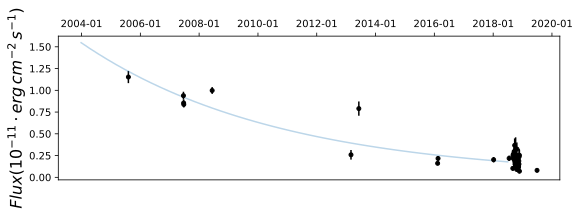

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
from matplotlib.pyplot import MultipleLocator

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker





fontsize=16
fontsize_s=10
markersize=8
fmt='o'
figsize=(9, 9)
fig = plt.figure(figsize=figsize,dpi=400)
ax1 = fig.add_subplot(311)


instrument=['X','C','N','S']
markers_ins=['^','*','+','.']
corlors_ins=['r','g','b','black']
marker_dict = dict(zip(instrument, markers_ins))
color_dict= dict(zip(instrument, corlors_ins))

for i in range(len(xrtfit_fluxgood)):
    label=xrtfit_fluxgood.iloc[i]['ins']
    marker=marker_dict[label] 
    color=color_dict[label] 
    ax1.errorbar(convert_date_single(xrtfit_fluxgood.iloc[i]['mjd']),
                 xrtfit_fluxgood.iloc[i]['flux']*10**11,yerr=xrtfit_fluxgood.iloc[i]['ferr']*10**11,
                 markersize=markersize,fmt='o',c=color,linestyle=None,marker=marker,
                 label=label)


#
#ax.set_xlabel('mjd/d',fontsize=fontsize)
ax1.xaxis.set_label_position('top')
ax1.xaxis.tick_top()
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax1.set_ylabel(ylabel='$Flux(10^{-11}\cdot erg\,cm^{-2}\,s^{-1})$',fontsize=fontsize)

#ax1.set_yscale('log')
#ax1.xaxis.ticks(rotation=45)

xrtdata_selction=xrtfit_fluxgood[xrtfit_fluxgood['mjd']<58350]
#xrtdata_selction=xrtdata_selction[abs(xrtdata_selction['mjd']-56450)>1]
t_xray=xrtdata_selction['mjd']
f_xray=xrtdata_selction['flux']
xfit_xrt=np.linspace(53000,58300)
tau,S0=decay_e_timescale_calc(t_xray,f_xray,tau_test=2000,S0_test=1)
print(tau,S0)
logey=decay_e_timescale(xfit_xrt,tau,S0)
yfit_xrt=np.exp(logey)
ax1.plot(convert_date(xfit_xrt),yfit_xrt*10**11,alpha=0.3)

secax1 = ax1.secondary_xaxis('bottom', functions=(date2mjd,mjd2date))
secax1.tick_params(axis = "y", labelsize = 16)
secax1.tick_params(axis = "x", labelsize = 0)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax1.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),ncol=1,fontsize=10,loc='right')    
#ax1.set_xticks()
ax1.axvspan(convert_xaxis_time(56293),convert_xaxis_time(57033), facecolor='#2ca02c', alpha=0.1)




ax2 = fig.add_subplot(312,sharex=ax1) 
uvot_bands=['um2','uuu','uw1','uw2']
colors_band=['r','g','b','black']
ax2.errorbar(convert_date(uvot_um2['mjd']),uvot_um2['flux_ext_cor']*10**11,yerr=uvot_um2['f_err']*10**11,color=colors_band[0],markersize=markersize,fmt='o',label='um2',marker='d',linestyle=None)
ax2.errorbar(convert_date(uvot_uuu['mjd']),uvot_uuu['flux_ext_cor']*10**11,yerr=uvot_uuu['f_err']*10**11,color=colors_band[1],markersize=markersize,fmt='o',label='uuu',marker='*',linestyle=None)
ax2.errorbar(convert_date(uvot_uw1['mjd']),uvot_uw1['flux_ext_cor']*10**11,yerr=uvot_uw1['f_err']*10**11,color=colors_band[2],markersize=markersize,fmt='o',label='uw1',marker='+',linestyle=None)
ax2.errorbar(convert_date(uvot_uw2['mjd']),uvot_uw2['flux_ext_cor']*10**11,yerr=uvot_uw2['f_err']*10**11,color=colors_band[3],markersize=markersize,fmt='o',label='uw2',marker='.',linestyle=None)



uvot_uf=[uvot_um2, uvot_uuu,uvot_uw1,uvot_uw2]
for band,uf_,c_ in zip(uvot_bands,uvot_uf,colors_band):    
    data_selction=uf_[uf_['mjd']<57429]
    t_uvot=data_selction['mjd']
    f_uvot=data_selction['flux_ext_cor']
    #ax2.scatter(t_xray,f_xray,label=band)    
    xfit_uvot=np.linspace(53000,58300)
    tau,S0=decay_e_timescale_calc(t_uvot,f_uvot,tau_test=500,S0_test=1)
    print(band,':',tau)
    logy=decay_e_timescale(xfit_uvot,tau,S0)
    yfit_uvot=np.exp(logy)
    ax2.plot(convert_date(xfit_uvot),yfit_uvot*10**11,color=c_,alpha=0.3)
    

#ax2.xaxis.set_minor_locator(AutoMinorLocator())
#ax.set_xlabel('mjd/d',fontsize=fontsize)
ax2.xaxis.set_label_position('top')
ax2.xaxis.tick_top()
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax2.get_xaxis().set_visible(False)
secax2 = ax2.secondary_xaxis('bottom', functions=(date2mjd,mjd2date))
ax2.yaxis.set_label_coords(-0.2,1.0)

ax2.axvspan(convert_xaxis_time(56293),convert_xaxis_time(57033), facecolor='#2ca02c', alpha=0.1)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax2.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),ncol=1,fontsize=11,loc='right')    


ax3 = fig.add_subplot(313,sharex=ax1) 
radioMrk1018L=radioMrk1018[radioMrk1018['band']==' L ']
radioMrk1018C=radioMrk1018[radioMrk1018['band']==' C ']
radioMrk1018X=radioMrk1018[radioMrk1018['band']==' X ']
fmt='o'
#ax.scatter(convert_date(lyuxrt_bokeh['mjd']),lyuxrt_bokeh['flux'],color='cyan',label='xrt',marker='*')

ax3.errorbar(convert_date(radioMrk1018L['mjd']),radioMrk1018L['Fint_mJy'],yerr=radioMrk1018L['ferr'],markersize=10,fmt=fmt,label='L',marker='*')
ax3.errorbar(convert_date(radioMrk1018C['mjd']),radioMrk1018C['Fint_mJy'],yerr=radioMrk1018C['ferr'],markersize=10,fmt=fmt,label='C',marker='d')
ax3.errorbar(convert_date(radioMrk1018X['mjd']),radioMrk1018X['Fint_mJy'],yerr=radioMrk1018X['ferr'],markersize=10,fmt=fmt,label='X',marker='h')

#ax3.xaxis.set_minor_locator(AutoMinorLocator())
#ax.set_xlabel('mjd/d',fontsize=fontsize)
ax3.xaxis.set_label_position('top')
ax3.xaxis.tick_top()
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
secax3 = ax3.secondary_xaxis('bottom', functions=(date2mjd,mjd2date))
secax3.set_xlabel('MJD(days)',fontsize=fontsize)
ax3.set_ylabel('$F_{int}(mJy)$',fontsize=fontsize)

ax3.axvspan(convert_xaxis_time(56293),convert_xaxis_time(57033), facecolor='#2ca02c', alpha=0.1)

#plt.xlabel('date',fontsize=fontsize,alpha=0.1)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax3.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),ncol=1,fontsize=10,loc='right') 




ax1.set_ylim(-1e-4,1.5)
ax2.set_ylim(-1e-4,7.1)
ax3.set_ylim(1,5)
secax1.tick_params(direction='in',axis = "y", labelsize = 16)
secax1.tick_params(direction='in',axis = "x", labelsize = 16)
secax2.tick_params(direction='in',axis = "x", labelsize = 16)
secax3.tick_params(direction='in',axis = "x", labelsize = 16)
#secax3.tick_params(axis = "y", labelsize = 16)
#secax3.tick_params(axis = "x", labelsize = 16)



ax1.set_yticks(np.arange(0.1,1.5,0.2))
ax2.set_yticks(np.arange(0.1,7.1,1))
#ax2.set_xticks(np.arange(0,1,0.5))
#secax2.set_xticks(np.arange(0,1,0.5))
ax3.set_xticks(np.arange(53005,59000,365),minor=True)
ax3.set_yticks(np.arange(1,5,1))

ax1.tick_params(direction='in',axis = "y", labelsize = 16)
ax1.tick_params(direction='in',axis = "x", labelsize = 16,rotation=45)
ax2.tick_params(direction='in',axis = "y", labelsize = 16)
ax3.tick_params(direction='in',axis = "y", labelsize = 16)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax3.xaxis.set_minor_locator(AutoMinorLocator())
#ax2.get_xaxis().set_visible(False)

ax1.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
ax2.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
ax3.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)

secax1.get_xaxis().set_visible(False)
secax2.get_xaxis().set_visible(False)
ax3.get_xaxis().set_visible(False)
ax1.yaxis.set_label_coords(-0.1,0.0)
ax3.yaxis.set_label_coords(-0.1,0.5)

#ax3.get_xaxis().set_visible(False)
#secax2.get_xaxis().set_visible(False)


#ax1.yaxis.set_major_locator(ticker.LinearLocator(3))
#ax2.yaxis.set_major_locator(ticker.LinearLocator(3))
   
ax1.set_xlim(convert_xaxis_time(53000),convert_xaxis_time(58800))
ax2.set_xlim(convert_xaxis_time(53000),convert_xaxis_time(58800))
ax3.set_xlim(convert_xaxis_time(53000),convert_xaxis_time(58800))

#plt.style.use("seaborn-deep")
#plt.style.use('ggplot')
plt.style.use('default')
fig.tight_layout()
plt.subplots_adjust(hspace = 0.0)
fig.savefig('subplots-xrt_uvot-radio-second.png',dpi=400)

AttributeError: 'AxesSubplot' object has no attribute 'secondary_xaxis'

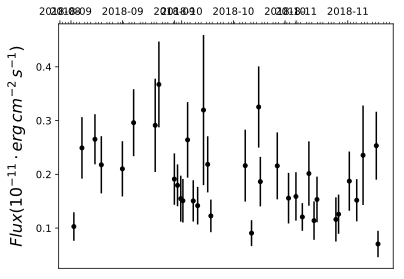

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
from matplotlib.pyplot import MultipleLocator

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker





fontsize=16
fontsize_s=10
markersize=8
fmt='o'
figsize=(6, 4.5)
fig = plt.figure(figsize=figsize,dpi=400)
ax1 = fig.add_subplot(111)
instrument=['X','C','N','S']
markers_ins=['^','*','+','.']
corlors_ins=['r','g','b','black']
marker_dict = dict(zip(instrument, markers_ins))
color_dict= dict(zip(instrument, corlors_ins))


xrtfit_fluxgoodrightpart=xrtfit_fluxgood[xrtfit_fluxgood['mjd']>58350]
xrtfit_fluxgoodrightpart=xrtfit_fluxgoodrightpart[xrtfit_fluxgoodrightpart['mjd']<58450]

for i in range(len(xrtfit_fluxgoodrightpart)):
    label=xrtfit_fluxgoodrightpart.iloc[i]['ins']
    marker=marker_dict[label] 
    color=color_dict[label] 
    ax1.errorbar(convert_date_single(xrtfit_fluxgoodrightpart.iloc[i]['mjd']),
                 xrtfit_fluxgoodrightpart.iloc[i]['flux']*10**11,yerr=xrtfit_fluxgoodrightpart.iloc[i]['ferr']*10**11,
                 markersize=markersize,fmt='o',c=color,linestyle=None,marker=marker,
                 label=label)
    
ax1.xaxis.set_minor_locator(AutoMinorLocator())
#ax.set_xlabel('mjd/d',fontsize=fontsize)
ax1.xaxis.set_label_position('top')
ax1.xaxis.tick_top()

ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax1.set_ylabel(ylabel='$Flux(10^{-11}\cdot erg\,cm^{-2}\,s^{-1})$',fontsize=fontsize)
ax1.yaxis.set_label_coords(-0.1,0.5)
#ax1.set_yscale('log')
#ax1.xaxis.ticks(rotation=45)



secax1 = ax1.secondary_xaxis('bottom', functions=(date2mjd,mjd2date))
secax1.tick_params(axis = "y", labelsize = 16)
secax1.tick_params(axis = "x", labelsize = 16)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.78),ncol=1,fontsize=10,loc='right')    
plt.xticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize,rotation=45)
plt.yticks(np.arange(-1,0.5,0.1),fontsize=fontsize)
plt.axvspan(convert_xaxis_time(56293),convert_xaxis_time(57033), facecolor='#2ca02c', alpha=0.1)

ax1.set_ylim(1e-3,0.5)
secax1.tick_params(axis = "y", labelsize = 10)
secax1.get_xaxis().set_visible(True)
#ax2.get_xaxis().set_visible(False)
ax1.grid(alpha=0.1,which='major', linestyle='--', linewidth=1)
plt.xlim(convert_xaxis_time(58350),convert_xaxis_time(58450))


#ax3.get_xaxis().set_visible(False)
#secax2.get_xaxis().set_visible(False)


#ax1.yaxis.set_major_locator(ticker.LinearLocator(3))
#ax2.yaxis.set_major_locator(ticker.LinearLocator(3))
   

#plt.style.use("seaborn-deep")
#plt.style.use('ggplot')
plt.style.use('default')
#plt.legend(loc='center',prop={'size':10},bbox_to_anchor=(1.0, 0.5, 0.2, 0.2),ncol=1)
#plt.xticks(rotation=45)
fig.tight_layout()
plt.subplots_adjust(hspace = 0.0)
fig.savefig('subplots-xrt_uvot-radio-second-right-part.png',dpi=400)

## get_simultaneous_data

In [46]:
def get_simultaneous_data(uvot,xrt,timebin=1):
    xf=[]
    uf=[]
    xt=[]
    ut=[]
    uferr=[]
    xferr=[]
    for i,i_,q_ in zip(uvot['mjd'],uvot['flux_ext_cor'],uvot['f_err']):
        if i<57429+1:
            for j,j_,k in zip(xrt['mjd'],xrt['flux'],xrt['ferr']):
                if (i-j)<=timebin and (i-j)>0:
                    uf.append(i_)
                    xf.append(j_)
                    ut.append(i)
                    xt.append(j)
                    uferr.append(q_)
                    xferr.append(k)
                    
    return xf,uf,xt,ut,uferr,xferr



xf_um2,uf_um2,xt_um2,ut_um2,uferr_um2,xferr_um2 =get_simultaneous_data(uvot_um2,xrt_divide_data[xrt_divide_data['energy']==2])
xf_uuu,uf_uuu,xt_uuu,ut_uuu,uferr_uuu,xferr_uuu =get_simultaneous_data(uvot_uuu,xrt_divide_data[xrt_divide_data['energy']==2])
xf_uw1,uf_uw1,xt_uw1,ut_uw1,uferr_uw1,xferr_uw1 =get_simultaneous_data(uvot_uw1,xrt_divide_data[xrt_divide_data['energy']==2])
xf_uw2,uf_uw2,xt_uw2,ut_uw2,uferr_uw2,xferr_uw2 =get_simultaneous_data(uvot_uw2,xrt_divide_data[xrt_divide_data['energy']==2])

In [133]:
xf_uw1_2keV,uf_uw1_2keV,xt_uw1_2keV,ut_uw1_2keV,uferr_uw1_2keV,xferr_uw1_2keV =get_simultaneous_data(uvot_uw1,xrt_divide_data[xrt_divide_data['energy']==2])

In [255]:
for i,j,k in zip(xf_uw1_2keV,uf_uw1_2keV,xt_uw1_2keV):
    print(k,i,j)

53587.3423726852 7.335124578461957e-12 4.238698651428911e-11
54271.310416666696 5.755861595427718e-12 3.582530222625893e-11
54275.713206018496 5.5115847465608756e-12 3.731632200347795e-11
54628.162511574104 5.348968379872598e-12 3.126819937537842e-11
56352.679849537 1.4806265759557106e-12 4.954313362787309e-12
56450.090069444406 2.932623650355689e-12 6.860843539662064e-12
56817.6881828704 6.969395393000439e-13 2.7914138677192014e-12
57429.019421296296 8.357086948589692e-13 2.356820241923142e-12


In [134]:
xf_uw1_2_10keV,uf_uw1_2_10keV,xt_uw1_2_10keV,ut_uw1_2_10keV,uferr_uw1_2_10keV,xferr_uw1_2_10keV = get_simultaneous_data(uvot_uw1,datazy1[datazy1['mjd']<57430])

In [139]:
for i in np.array(xf_uw1_2_10keV):
    print(4*np.pi*D_cm.value**2*i)

4.855595653163798e+43
3.9538776067548867e+43
3.5279589801548234e+43
4.202747435905801e+43
1.0906491479666241e+43
3.32745543942836e+43
7.93733179529852e+42
6.768835264919616e+42


In [135]:
xf_uw1_2_10keV,uf_uw1_2_10keV,xt_uw1_2_10keV

([1.1527228858989945e-11,
  9.386541901157256e-12,
  8.375407153780467e-12,
  9.977361170642985e-12,
  2.5892111352562733e-12,
  7.899409899049053e-12,
  1.8843298880236694e-12,
  1.6069277341223891e-12],
 [4.238698651428911e-11,
  3.582530222625893e-11,
  3.731632200347795e-11,
  3.126819937537842e-11,
  4.954313362787309e-12,
  6.860843539662064e-12,
  2.7914138677192014e-12,
  2.356820241923142e-12],
 [53587.3423726852,
  54271.310416666696,
  54275.713206018496,
  54628.162511574104,
  56352.679849537,
  56450.090069444406,
  56817.6881828704,
  57429.019421296296])

In [17]:
markers_pd=['*','.','+','d','h','v','^','x','>','1','2','3','4','8','p','P','<','H','X','D','|','_']
colors_pd=['red','green','blue','yellow','lightblue','cyan','tan','gold','sandybrown','olivedrab','chartreuse','darkgreen','m','skyblue','violet','crimson','aqua','purple','magenta','lime','turquoise','lightcyan','teal','indigo']
print(len(markers_pd))
print(len(colors_pd))

22
24


In [20]:
import numpy as np
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.modeling import models,fitting
from astropy.modeling.models import custom_model
import numpy as np
from scipy.optimize import least_squares,curve_fit
from scipy.stats import f
import os

def linear(x,k,b):#linear
    return k*x+b

def broken_linear_curve(x,k1,k2,x0,b1,b2):#two lines divided by x0
    return np.where(x<x0,k1*x+b1,k2*x+b2)    

def broken_linear_curve_dot(x,k1,k2,x0,y0):#connect by x0,y0
    return np.where(x<x0,k1*(x-x0)+y0,k2*(x-x0)+y0) 

def power_law(x,S0,alpha):
    return S0*x**alpha



def alpha_calc(x,y):
    popt,pcov=curve_fit(power_law,x,y,p0=(10,0.5))
    S0=popt[0]
    alpha=popt[1]
    alpha_err=np.sqrt(np.diag(pcov))[1]
    return S0,alpha,alpha_err

def linear_calc(x,y):#linear_parameter
    popt,pcov=curve_fit(linear,x,y,p0=(1,1))
    return popt[0],popt[1]

def broken_linear_curve_calc(x,y):
    param_bounds=([-np.inf,0,-4,-np.inf,-np.inf],[-0,np.inf,-2.0,np.inf,np.inf])
    popt,pcov=curve_fit(broken_linear_curve,x,y,p0=(-1.5,1.5,-2.2,2,-1.5),bounds=param_bounds)
    k1=popt[0]
    k2=popt[1]
    x0=popt[2]
    b1=popt[3]
    b2=popt[4]
    return k1,k2,x0,b1,b2

def broken_linear_curve_dot_calc(x,y):
    param_bounds=([-np.inf,0,-4,-np.inf],[-0,np.inf,-2.0,np.inf])
    popt,pcov=curve_fit(broken_linear_curve_dot,x,y,p0=(-1.5,1.5,-2.2,1),bounds=param_bounds)
    k1=popt[0]
    k2=popt[1]
    x0=popt[2]
    y0=popt[3]
    return k1,k2,x0,y0


def decay_e_timescale(t,tau,S0):
    logey=-t/tau+S0
    return logey
#logy=-(x-x[0])/tau+S0

def decay_e_timescale_calc(x,y,tau_test=1000,S0_test=1):
    logey=np.log(y)
    param_bounds=([0,-np.inf],[np.inf,np.inf])
    popt,pcov=curve_fit(decay_e_timescale,x,logey,p0=(tau_test,S0_test),bounds=param_bounds)
    tau=popt[0]
    S0=popt[1]    
    return tau,S0


def exp_timescale(t,Tr,Tf,tp,S0):
    logey=-(np.exp((tp-t)/Tr)+np.exp((t-tp)/Tf))+S0
    return logey


def exp_timescale_calc(x,y,Tr_test=10000,Tf_test=2000,tp_test=50000,S0_test=1):
    logey=np.log(y)
    param_bounds=([10,10,45700,-np.inf],[np.inf,np.inf,58300,np.inf])
    popt,pcov=curve_fit(exp_timescale,x,logey,p0=(Tr_test,Tf_test,tp_test,S0_test),bounds=param_bounds)
    Tr=popt[0]
    Tf=popt[1]
    tp=popt[2] 
    S0=popt[3]    
    return Tr,Tf,tp,S0


In [37]:
xt_uw1

[53587.3423726852,
 54271.310416666696,
 54275.713206018496,
 54628.162511574104,
 56352.679849537,
 56450.090069444406,
 56817.6881828704,
 57429.019421296296]

In [36]:
np.log10(xf_uw1)

array([-11.13459251, -11.23988966, -11.25872351, -11.27172997,
       -11.82955446, -11.53274367, -12.1568049 , -12.07794508])

In [41]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

uvot_bands=['um2','uuu','uw1','uw2']
uvot_sim_xf=[xf_um2, xf_uuu,xf_uw1,xf_uw2]
uvot_sim_uf=[uf_um2, uf_uuu,uf_uw1,uf_uw2]
uvot_sim_xf_err=[xferr_um2, xferr_uuu,xferr_uw1,xferr_uw2]
uvot_sim_uf_err=[uferr_um2, uferr_uuu,uferr_uw1,uferr_uw2]



marker_dict = dict(zip(uvot_bands, markers_pd[:len(uvot_bands)]))
color_dict = dict(zip(uvot_bands, colors_pd[:len(uvot_bands)]))
fontsize=12
plt.figure(num=None, figsize=(4, 4), dpi=400)
fig, ax = plt.subplots(constrained_layout=True)
#fig.suptitle('$log(flux_{UVOT})-vs-log(flux_{XRT})$ correlation',fontsize=fontsize)
fmt='o'
for i,(band,x_,y_,xerr_,yerr_) in enumerate(zip(uvot_bands,uvot_sim_xf,uvot_sim_uf,uvot_sim_xf_err,uvot_sim_uf_err)):
    x1=np.log10(x_)
    y1=np.log10(y_)  
    marker =marker_dict[band]
    color= color_dict[band]
    label=band
    x1_outlier=x1[abs(x1+11.10)>0.01]
    y1_outlier=y1[abs(x1+11.10)>0.01]
    k,b=linear_calc(x1,y1)
    print(band,k,b)
    x2=np.linspace(min(x1),max(x1),10)
    y2=k*x2+b
    #ax.set_ylabel('log(%s_flux)'%band,fontsize=fontsize)
    ax.errorbar(x1,y1,marker=marker,markersize=8,fmt=fmt,color=color,label=label)
    ax.plot(x2,y2,marker='',color=color,alpha=0.5)    
    ax.legend(bbox_to_anchor=(0.32, 1.0),ncol=1,fontsize=16)    
    ax.grid(alpha=0.1,which='major', linestyle='-.', linewidth=0.5)
    ax.tick_params(axis = "y", labelsize = 16)
    ax.tick_params(axis = "x", labelsize = 16)    

'''for a_,b_,c_ in zip(xf_uw1,uf_uw1,xt_uw1):
    a=np.log10(a_)
    b=np.log10(b_) 
    c=int(c_)
    plt.text(a,b,c)'''
    
        
ax.set_xlabel('log($F_{1-3keV}$)(erg/s)',fontsize=20)    
ax.set_ylabel('log$(\lambda F_{\lambda})$(erg/s)',fontsize=20) 
#circle=plt.Circle((-11.53,-11.22),0.05,alpha=0.1,color='grey')
#ax.add_artist(circle)


x_major_locator=MultipleLocator(0.5)
#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(0.5)
#把y轴的刻度间隔设置为10，并存在变量里
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)



plt.xlim(-12.5,-11)
#plt.title('UVOT-XRT correlation',fontsize=20)
plt.tight_layout()
plt.style.use('default')   
#plt.show()
fig.savefig('uvot_xrt_1-3keV_correlation-fig.png',dpi=400)


um2 1.426023860255823 5.500576098359631
uuu 0.9010491114690747 -0.48196643124013416
uw1 1.2938260608630348 4.034926630092382
uw2 1.5152283466216057 6.598872687244647


/Users/brettlv/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


## xrt-uvot-outlier

### Lx-Luv

In [120]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

uvot_bands=['UVM2(2246$\AA$)','U(3465$\AA$)','UVW1(2600$\AA$)','UVW2(1928$\AA$)']
uvot_sim_xf=[xf_um2, xf_uuu,xf_uw1,xf_uw2]
uvot_sim_uf=[uf_um2, uf_uuu,uf_uw1,uf_uw2]
uvot_sim_xf_err=[xferr_um2, xferr_uuu,xferr_uw1,xferr_uw2]
uvot_sim_uf_err=[uferr_um2, uferr_uuu,uferr_uw1,uferr_uw2]



marker_dict = dict(zip(uvot_bands, markers_pd[:len(uvot_bands)]))
color_dict = dict(zip(uvot_bands, colors_pd[:len(uvot_bands)]))
fontsize=12
plt.figure(num=None, figsize=(4, 4), dpi=400)
fig, ax = plt.subplots(constrained_layout=True)
#fig.suptitle('$log(flux_{UVOT})-vs-log(flux_{XRT})$ correlation',fontsize=fontsize)
fmt='o'
for i,(band,x_,y_,xerr_,yerr_) in enumerate(zip(uvot_bands,uvot_sim_xf,uvot_sim_uf,uvot_sim_xf_err,uvot_sim_uf_err)):
    x1=np.log10(x_)
    y1=np.log10(y_)  
    marker =marker_dict[band]
    color= color_dict[band]
    label=band
    x1_outlier=x1[abs(x1+11.53)>0.01]
    y1_outlier=y1[abs(x1+11.53)>0.01]
    k,b=linear_calc(x1_outlier,y1_outlier)
    print(band,k,b)
    x2=np.linspace(min(x1),max(x1),10)
    y2=k*x2+b
    #ax.set_ylabel('log(%s_flux)'%band,fontsize=fontsize)
    ax.errorbar(x1,y1,marker=marker,markersize=8,fmt=fmt,color=color,label=label)
    ax.plot(x2,y2,marker='',color=color,alpha=0.5)    
    ax.legend(bbox_to_anchor=(0.4, 1.0),ncol=1,fontsize=10)    
    ax.grid(alpha=0.1,which='major', linestyle='-.', linewidth=0.5)
    ax.tick_params(axis = "y", labelsize = 16)
    ax.tick_params(axis = "x", labelsize = 16)    

'''for a_,b_,c_ in zip(xf_uw1,uf_uw1,xt_uw1):
    a=np.log10(a_)
    b=np.log10(b_) 
    c=int(c_)
    plt.text(a,b,c)'''
    
        
ax.set_xlabel('log($F_{1-3keV}$)(erg/s)',fontsize=20)    
ax.set_ylabel('log$(\lambda F_{\lambda})$(erg/s)',fontsize=20) 
#circle=plt.Circle((-11.53,-11.22),0.05,alpha=0.1,color='grey')
#ax.add_artist(circle)


x_major_locator=MultipleLocator(0.5)
#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(0.5)
#把y轴的刻度间隔设置为10，并存在变量里
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)



plt.xlim(-12.5,-11)
#plt.title('UVOT-XRT correlation',fontsize=20)
plt.tight_layout()
plt.style.use('default')   
#plt.show()
fig.savefig('uvot_xrt_1-3keV_correlation-fig-outlier.png',dpi=400)


UVM2(2246$\AA$) 1.4751860184532861 6.12856533191564
U(3465$\AA$) 0.9450981324357269 0.08070844174834513
UVW1(2600$\AA$) 1.302062008445819 4.169789946951365
UVW2(1928$\AA$) 1.5411315394781266 6.948411479425676


/Users/brettlv/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


uvot_bands=['uw2','um2','uw1','uuu']
wave1=np.array([1928,2246,2600,3465])# w2,m2,w1,u

### UV-X

In [119]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

uvot_bands=['UVM2(2246$\AA$)','U(3465$\AA$)','UVW1(2600$\AA$)','UVW2(1928$\AA$)']
uvot_sim_xf=[xf_um2, xf_uuu,xf_uw1,xf_uw2]
uvot_sim_uf=[uf_um2, uf_uuu,uf_uw1,uf_uw2]
uvot_sim_xf_err=[xferr_um2, xferr_uuu,xferr_uw1,xferr_uw2]
uvot_sim_uf_err=[uferr_um2, uferr_uuu,uferr_uw1,uferr_uw2]



marker_dict = dict(zip(uvot_bands, markers_pd[:len(uvot_bands)]))
color_dict = dict(zip(uvot_bands, colors_pd[:len(uvot_bands)]))
fontsize=12
plt.figure(num=None, figsize=(4, 4), dpi=400)
fig, ax = plt.subplots(constrained_layout=True)
#fig.suptitle('$log(flux_{UVOT})-vs-log(flux_{XRT})$ correlation',fontsize=fontsize)
fmt='o'
for i,(band,x_,y_,xerr_,yerr_) in enumerate(zip(uvot_bands,uvot_sim_xf,uvot_sim_uf,uvot_sim_xf_err,uvot_sim_uf_err)):
    x1=np.log10(y_)
    y1=np.log10(x_)  
    marker =marker_dict[band]
    color= color_dict[band]
    label=band
    x1_outlier=x1[abs(y1+11.53)>0.01]
    y1_outlier=y1[abs(y1+11.53)>0.01]
    k,b=linear_calc(x1_outlier,y1_outlier)
    print(band,k,b)
    x2=np.linspace(min(x1),max(x1),10)
    y2=k*x2+b
    #ax.set_ylabel('log(%s_flux)'%band,fontsize=fontsize)
    ax.errorbar(x1,y1,marker=marker,markersize=8,fmt=fmt,color=color,label=label)
    ax.plot(x2,y2,marker='',color=color,alpha=0.5)    
    ax.legend(bbox_to_anchor=(0.4, 1.0),ncol=1,fontsize=10)    
    ax.grid(alpha=0.1,which='major', linestyle='-.', linewidth=0.5)
    ax.tick_params(axis = "y", labelsize = 16)
    ax.tick_params(axis = "x", labelsize = 16)    

'''for a_,b_,c_ in zip(xf_uw1,uf_uw1,xt_uw1):
    a=np.log10(a_)
    b=np.log10(b_) 
    c=int(c_)
    plt.text(a,b,c)'''
    
        
ax.set_ylabel('log($F_{1-3keV}$)(erg/s)',fontsize=20)    
ax.set_xlabel('log$(\lambda F_{\lambda})$(erg/s)',fontsize=20) 
#circle=plt.Circle((-11.53,-11.22),0.05,alpha=0.1,color='grey')
#ax.add_artist(circle)


x_major_locator=MultipleLocator(0.5)
#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(0.5)
#把y轴的刻度间隔设置为10，并存在变量里
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)



#plt.xlim(-12.5,-11)
#plt.title('UVOT-XRT correlation',fontsize=20)
plt.tight_layout()
plt.style.use('default')   
#plt.show()
fig.savefig('xrt_1-3keV_uvot_correlation-fig-outlier.png',dpi=400)


UVM2(2246$\AA$) 0.6705936875323374 -4.235484022311953
U(3465$\AA$) 1.0464542611214152 -0.2130700599759224
UVW1(2600$\AA$) 0.7573882228926516 -3.318163168852752
UVW2(1928$\AA$) 0.6378833510418571 -4.62915567947171


/Users/brettlv/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


# SED

In [43]:
pwd

'/Users/brettlv/Downloads'

In [ ]:
xf_um2,uf_um2,xt_um2,ut_um2,uferr_um2,xferr_um2 
xf_uuu,uf_uuu,xt_uuu,ut_uuu,uferr_uuu,xferr_uuu 
xf_uw1,uf_uw1,xt_uw1,ut_uw1,uferr_uw1,xferr_uw1 
xf_uw2,uf_uw2,xt_uw2,ut_uw2,uferr_uw2,xferr_uw2

In [80]:
fig = plt.figure(figsize=(4,3),dpi=400)
ax = fig.add_subplot(111)
marker_dict = dict(zip(xt_uw1, markers_pd[:len(xt_uw1)]))
color_dict = dict(zip(xt_uw1, colors_pd[:len(xt_uw1)]))

f_1keV=2.418e17 #Hz
f_2keV=4.836e17 #Hz
#\nuF\nu


for i,j in zip(xt_uw1,ut_uw1):
    m_=marker_dict[i]
    c_=color_dict[i]  
    print(i,j,i-j)
    puvot= uvotalldata[abs(uvotalldata['mjd']-j)<1]     
    pxrt= xrt_divide_data[abs(xrt_divide_data['mjd']-i)<1] 
    print(len(puvot),len(pxrt))
    if len(puvot)==4 and i<57429:
        plt.scatter(puvot['freq'],puvot['flux_ext_cor'],marker=m_,color=c_,label='MJD %d'%int(i))
        plt.scatter(pxrt['energy']*f_1keV,pxrt['flux']*pxrt['energy']/pxrt['bandwidth'],marker=m_,color=c_)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.8),ncol=1,fontsize=6,loc='right')    

plt.semilogx()
plt.semilogy()
#plt.xlim(5e-4,0.3e-1)
plt.ylim(1e-13,1e-9)
plt.xlabel(r'frequency(Hz)')
plt.ylabel(r'$ \nu F_{\nu}(erg cm^{-2} s^{-1})$')
plt.style.use('default')

plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
fig.savefig('Mrk1018_uvot_xray_sed.png',dpi=400) 


53587.3423726852 53587.657016993406 -0.31464430820778944
4 4
54271.310416666696 54271.47921371007 -0.16879704337043222
1 4
54275.713206018496 54275.7872701765 -0.07406415800505783
1 4
54628.162511574104 54628.29846871922 -0.1359571451175725
4 4
56352.679849537 56352.683740463886 -0.003890926884196233
4 4
56450.090069444406 56450.729083343984 -0.6390138995775487
4 4
56817.6881828704 56817.725747743054 -0.037564872654911596
4 4
57429.019421296296 57429.02439339769 -0.004972101392922923
4 4


In [50]:
fig = plt.figure(figsize=(4,3),dpi=400)
ax = fig.add_subplot(111)
marker_dict = dict(zip(xt_uw1, markers_pd[:len(xt_uw1)]))
color_dict = dict(zip(xt_uw1, colors_pd[:len(xt_uw1)]))

f_1keV=2.418e17 #Hz
f_2keV=4.836e17 #Hz
#\nuF\nu


for i,j in zip(xt_uw1,ut_uw1):
    m_=marker_dict[i]
    c_=color_dict[i]  
    print(i,j,i-j)
    puvot= uvotalldata[abs(uvotalldata['mjd']-j)<1]     
    pxrt= xrt_divide_data[abs(xrt_divide_data['mjd']-i)<1] 
    print(len(puvot),len(pxrt))
    if len(puvot)==4 and i<57429:
        plt.scatter(puvot['freq'],puvot['flux_ext_cor']/puvot['freq'],marker=m_,color=c_,label='MJD %d'%int(i))
        plt.scatter(pxrt['energy']*f_1keV,pxrt['flux']/pxrt['bandwidth'],marker=m_,color=c_)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.8),ncol=1,fontsize=6,loc='right')    

plt.semilogx()
plt.semilogy()
#plt.xlim(5e-4,0.3e-1)
plt.ylim(1e-13,1e-9)
plt.xlabel(r'frequency(Hz)')
plt.ylabel(r'$ F_{\nu}(erg cm^{-2} s^{-1})$')
plt.style.use('default')

plt.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
fig.savefig('Mrk1018_uvot_xray_sed_F_nu.png',dpi=400) 


53587.3423726852 53587.657016993406 -0.31464430820778944
4 4
54271.310416666696 54271.47921371007 -0.16879704337043222
1 4
54275.713206018496 54275.7872701765 -0.07406415800505783
1 4
54628.162511574104 54628.29846871922 -0.1359571451175725
4 4
56352.679849537 56352.683740463886 -0.003890926884196233
4 4
56450.090069444406 56450.729083343984 -0.6390138995775487
4 4
56817.6881828704 56817.725747743054 -0.037564872654911596
4 4
57429.019421296296 57429.02439339769 -0.004972101392922923
4 4


# changing-look AGN

In [52]:
NGC2617=pd.read_excel('/Users/brettlv/python_code/Mrk1018/data/catalog_clAGN.xlsx',sheet_name='工作表16',index=None)
#data.columns
ZTF18aajupnt=pd.read_excel('/Users/brettlv/python_code/Mrk1018/data/catalog_clAGN.xlsx',sheet_name='工作表17',index=None)
#data.columns

In [ ]:
xf_um2,uf_um2,xt_um2,ut_um2,uferr_um2,xferr_um2 
xf_uuu,uf_uuu,xt_uuu,ut_uuu,uferr_uuu,xferr_uuu 
xf_uw1,uf_uw1,xt_uw1,ut_uw1,uferr_uw1,xferr_uw1 
xf_uw2,uf_uw2,xt_uw2,ut_uw2,uferr_uw2,xferr_uw2

In [54]:
NGC2617.columns

Index(['MJD', 'logLUV', 'Unnamed: 2', 'Unnamed: 3', 'logLx', 'Unnamed: 5',
       'Unnamed: 6', 'alpha_ox', 'Unnamed: 8', 'Unnamed: 9', 'log(Luv/Ledd)',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'NAME', 'bhmasslog'],
      dtype='object')

In [55]:
ZTF18aajupnt.columns

Index(['MJD', 'logLUV', 'logLx', 'alpha_ox', 'log(Luv/Ledd)', 'NAME',
       'bhmasslog'],
      dtype='object')

In [65]:
x_

array([43.48992509, 43.38462794, 43.36579409, 43.35278763, 42.79496314,
       43.09177393, 42.4677127 , 42.54657252])

## Lx-UV

In [121]:

import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator



fontsize=12
plt.figure(num=None, figsize=(4, 4), dpi=400)
fig, ax = plt.subplots(constrained_layout=True)
#fig.suptitle('$log(flux_{UVOT})-vs-log(flux_{XRT})$ correlation',fontsize=fontsize)
fmt='o'

x_=np.log10(4*np.pi*D_cm.value**2*np.array(xf_uw1))
y_=np.log10(4*np.pi*D_cm.value**2*np.array(uf_uw1))

ax.scatter(x_,y_,label='Mrk1018',marker='+')
k,b=linear_calc(x_,y_)
ax.plot(x_,k*x_+b,label='Mrk1018')
print('Mrk1018',k,b)

ax.scatter(NGC2617['logLx'],NGC2617['logLUV'],label='NGC2617')
k,b=linear_calc(NGC2617['logLx'],NGC2617['logLUV'])
ax.plot(NGC2617['logLx'],k*NGC2617['logLx']+b,label='NGC2617')
print('NGC2617',k,b)

ax.scatter(ZTF18aajupnt['logLx'],ZTF18aajupnt['logLUV'],label='ZTF18aajupnt')
k,b=linear_calc(ZTF18aajupnt['logLx'],ZTF18aajupnt['logLUV'])
ax.plot(ZTF18aajupnt['logLx'],k*ZTF18aajupnt['logLx']+b,label='ZTF18aajupnt')

print('ZTF18aajupnt',k,b)
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.32, 0.8),ncol=1,fontsize=10,loc='right')    
  
ax.grid(alpha=0.1,which='major', linestyle='-.', linewidth=0.5)
ax.tick_params(axis = "y", labelsize = 16)
ax.tick_params(axis = "x", labelsize = 16)    


    
        
ax.set_xlabel(r'log( $ \nu L_{1-3keV}$)(erg/s)',fontsize=20)    
ax.set_ylabel(r'log$(\lambda L_{UV})$(erg/s)',fontsize=20) 
#circle=plt.Circle((-11.53,-11.22),0.05,alpha=0.1,color='grey')
#ax.add_artist(circle)


#x_major_locator=MultipleLocator(0.5)
#把x轴的刻度间隔设置为1，并存在变量里
#y_major_locator=MultipleLocator(0.5)
#把y轴的刻度间隔设置为10，并存在变量里
#ax为两条坐标轴的实例
#ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
#ax.yaxis.set_major_locator(y_major_locator)


plt.xlim(40,44)
#plt.title('UVOT-XRT correlation',fontsize=20)
plt.tight_layout()
plt.style.use('default')   
#plt.show()
fig.savefig('uvot_xrt_1-3keV_correlation-cl.png',dpi=400)

Mrk1018 1.2938261441101377 -12.015183797298167
NGC2617 0.34438069769546553 28.398176796186025
ZTF18aajupnt -0.2968416843842222 54.87729148164801


/Users/brettlv/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


In [84]:
1/0.3443,1/-0.2968

(2.904443799012489, -3.3692722371967654)

## UV-X

In [122]:

import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator





fontsize=12
plt.figure(num=None, figsize=(4, 4), dpi=400)
fig, ax = plt.subplots(constrained_layout=True)
#fig.suptitle('$log(flux_{UVOT})-vs-log(flux_{XRT})$ correlation',fontsize=fontsize)
fmt='o'

x_=np.log10(4*np.pi*D_cm.value**2*np.array(xf_uw1))
y_=np.log10(4*np.pi*D_cm.value**2*np.array(uf_uw1))

ax.scatter(y_,x_,label='Mrk1018',marker='+')
k,b=linear_calc(y_,x_)
ax.plot(y_,k*y_+b,label='Mrk1018')
print('Mrk1018',k,b)

ax.scatter(NGC2617['logLUV'],NGC2617['logLx'],label='NGC2617')
k,b=linear_calc(NGC2617['logLUV'],NGC2617['logLx'])
ax.plot(NGC2617['logLUV'],k*NGC2617['logLUV']+b,label='NGC2617')
print('NGC2617',k,b)



ax.scatter(ZTF18aajupnt['logLUV'],ZTF18aajupnt['logLx'],label='ZTF18aajupnt')
k,b=linear_calc(ZTF18aajupnt['logLUV'],ZTF18aajupnt['logLx'])
ax.plot(ZTF18aajupnt['logLUV'],ZTF18aajupnt['logLUV']*k+b,label='ZTF18aajupnt')
print('ZTF18aajupnt',k,b)

    
#ax.legend(bbox_to_anchor=(0.32, 1.0),ncol=1,fontsize=10)  
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.32, 0.8),ncol=1,fontsize=10,loc='right')    


ax.grid(alpha=0.1,which='major', linestyle='-.', linewidth=0.5)
ax.tick_params(axis = "y", labelsize = 16)
ax.tick_params(axis = "x", labelsize = 16)    


    
        
ax.set_ylabel(r'log( $ \nu L_{1-3keV}$)(erg/s)',fontsize=20)    
ax.set_xlabel(r'log$(\lambda L_{UV})$(erg/s)',fontsize=20) 
#circle=plt.Circle((-11.53,-11.22),0.05,alpha=0.1,color='grey')
#ax.add_artist(circle)


#x_major_locator=MultipleLocator(0.5)
#把x轴的刻度间隔设置为1，并存在变量里
#y_major_locator=MultipleLocator(0.5)
#把y轴的刻度间隔设置为10，并存在变量里
#ax为两条坐标轴的实例
#ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
#ax.yaxis.set_major_locator(y_major_locator)


plt.xlim(42,45)
#plt.title('UVOT-XRT correlation',fontsize=20)
plt.tight_layout()
plt.style.use('default')   
#plt.show()
fig.savefig('xrt_1-3keV_uvot_correlation-cl.png',dpi=400)


Mrk1018 0.7293960553472844 11.187702078806819
NGC2617 2.4127227225621124 -61.29192105887813
ZTF18aajupnt -2.1789810805277106 134.25921110364726


/Users/brettlv/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
def isString(obj):
    return type(obj) is type('')

fig = plt.figure(figsize=(8/1.2,3),dpi=400)
ax1 = fig.add_subplot(121)


x1='log_lambda'
x2='log(Lbol/Ledd)'
x3='logLx'
x4='bhmasslog'
x5='logLUV'
x6='logLv2keV'
x7='LogLv2500'
x4_logm='bhmasslog'
x4_m='bhmass'
x_state='state'
x8='log(Luv/Ledd)'
y='alpha_ox'



'''for row in range(len(changing_look_quasars)):        
    px=changing_look_quasars.loc[row][x3]
    py=changing_look_quasars.loc[row][y]
    pmass=changing_look_quasars.loc[row][x4_m]
    pledd=1.26*10**38*pmass 
    pstate=changing_look_quasars.loc[row][x_state]
    
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(px) or isString(py):
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        if pstate=='bright':
            ax1.scatter(10**px/pledd,py,marker='^',color='black',label=pstate)
        else:
            ax1.scatter(10**px/pledd,py,marker='v',color='grey',label=pstate)'''
        

for row in range(len(NGC2617)):        
    px=NGC2617.loc[row][x3]#logLx
    py=NGC2617.loc[row][y]
    pmass=10**7.5
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax1.scatter(10**px/pledd,py,marker='*',color='grey',label='Type2(NGC2617)')

for row in range(len(ZTF18aajupnt)):        
    px=ZTF18aajupnt.loc[row][x3]#logLx
    py=ZTF18aajupnt.loc[row][y]
    pmass=10**6.4
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax1.scatter(10**px/pledd,py,marker='+',color='grey',label='Type1(ZTF18aajupnt)')
        

#F_2_10s=[1.14e-11,9.32e-12,7.88e-12,8.78e-12,9.83e-12,2.58e-12,8.26e-12,1.97e-12,1.5e-12,2.54e-12,1.89e-12,3.03e-12]
#for mjd,F_ in zip(mjds,F_2_10s):


marker_dict = dict(zip(xt_uw1, markers_pd[:len(xt_uw1)]))
color_dict = dict(zip(xt_uw1, colors_pd[:len(xt_uw1)]))
f_2keV=4.836e17 #Hz
F_2keV=np.array(xf_uw1_2keV)#\nuF\nu

alpha_ox=1-(np.log10(uf_uw1_2keV)-np.log10(F_2keV))/(np.log10(f_uw1)-np.log10(f_2keV))
uw1_rate=4*np.pi*D_cm.value**2*np.array(uf_uw1_2keV)/Ledd  
xray_rate=4*np.pi*D_cm.value**2*np.array(F_2keV)/Ledd
   
    #fig = plt.figure(figsize=(4,3),dpi=400)
    #ax = fig.add_subplot(111)
for i,j,k in zip(xray_rate,alpha_ox,xt_uw1_2keV):
    m_=marker_dict[k]
    c_=color_dict[k]
    if k<57429:
        plt.scatter(x=i,y=j,marker=m_,color=c_,label=int(k))

        
        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.72),ncol=1,fontsize=6,loc='right',frameon=False)
       












ax2 = fig.add_subplot(122,sharey=ax1)

'''
for row in range(len(changing_look_quasars)):        
    px=changing_look_quasars.loc[row][x5]
    py=changing_look_quasars.loc[row][y]
    pmass=changing_look_quasars.loc[row][x4_m]
    pledd=1.26*10**38*pmass      
    pstate=changing_look_quasars.loc[row][x_state]
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(px) or isString(py):
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        if pstate=='bright':
            ax2.scatter(10**px/pledd,py,marker='^',color='grey',label=pstate)
        else:
            ax2.scatter(10**px/pledd,py,marker='v',color='black',label=pstate)'''

for row in range(len(NGC2617)):        
    px=NGC2617.loc[row][x8]#luv/ledd
    px_=10**NGC2617.loc[row][x5]    
    py=NGC2617.loc[row][y]
    pmass=10**7.5
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax2.scatter(10**px,py,marker='*',color='grey',label='Type2(NGC2617)')
        

for row in range(len(ZTF18aajupnt)):  
    px=ZTF18aajupnt.loc[row][x8]#luv/ledd
    px_=10**ZTF18aajupnt.loc[row][x5]
    py=ZTF18aajupnt.loc[row][y]
    pmass=10**6.4
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax2.scatter(10**px,py,marker='+',color='grey',label='Type1(ZTF18aajupnt)')
        



#F_2_10s=[1.14e-11,9.32e-12,7.88e-12,8.78e-12,9.83e-12,2.58e-12,8.26e-12,1.97e-12,1.5e-12,2.54e-12,1.89e-12,3.03e-12]
#for mjd,F_ in zip(mjds,F_2_10s):

marker_dict = dict(zip(xt_uw1, markers_pd[:len(xt_uw1)]))
color_dict = dict(zip(xt_uw1, colors_pd[:len(xt_uw1)]))

f_2keV=4.836e17 #Hz
F_2keV=np.array(xf_uw1_2keV)#\nuF\nu

alpha_ox=1-(np.log10(uf_uw1_2keV)-np.log10(F_2keV))/(np.log10(f_uw1)-np.log10(f_2keV))
uw1_rate=4*np.pi*D_cm.value**2*np.array(uf_uw1_2keV)/Ledd  
xray_rate=4*np.pi*D_cm.value**2*np.array(F_2keV)/Ledd   
    #fig = plt.figure(figsize=(4,3),dpi=400)
    #ax = fig.add_subplot(111)
for i,j,k in zip(uw1_rate,alpha_ox,xt_uw1_2keV):
    m_=marker_dict[k]
    c_=color_dict[k]
    if k<57429:
        plt.scatter(x=i,y=j,marker=m_,color=c_,label=int(k))
        
        
        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.5, 0.72),ncol=1,fontsize=6,loc='right',frameon=False)

ax1.semilogx()
ax1.set_xlim(1e-4,1e-2)
ax1.set_ylim(1,2)
ax1.set_xlabel(r'Eddington rate  $\nu L_{2keV}/L_{Edd}$')
ax1.set_ylabel(r'UV-xray spectrum index $ \alpha_{OX} $')
ax1.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)


ax2.semilogx()
ax2.set_xlim(0.8e-3,3e-2)
ax2.set_ylim(1,2)

#plt.xlabel(r'UV Eddington rate $\lambda L_{2600\AA}/L_{Edd}$')
ax2.set_xlabel(r'UV Eddington rate $\lambda L_{UV}/L_{Edd}$')
#ax2.set_ylabel(r'UV-xray spectrum index $ \alpha_{OX} $')
ax2.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)

plt.subplots_adjust(hspace = 0.0,wspace = 0.0)
plt.tight_layout()
plt.style.use('default')
fig.savefig('Mrk1018_subplots_plus_2individuals_alpha_ox_L_x_Luv_rate.png',dpi=400)



# subplot_alpha_ox

3.089762461930998e+43
2.424532113039021e+43
2.3216357777588066e+43
2.2531371530777244e+43
6.236818973679421e+42
1.235304236883188e+43
2.935706958662566e+42

1.785460061452522e+44
1.5090633134037089e+44
1.5718692942479228e+44
1.3171052195336558e+44
2.086897269329418e+43
2.8899818400186675e+43
1.1758226723943212e+43


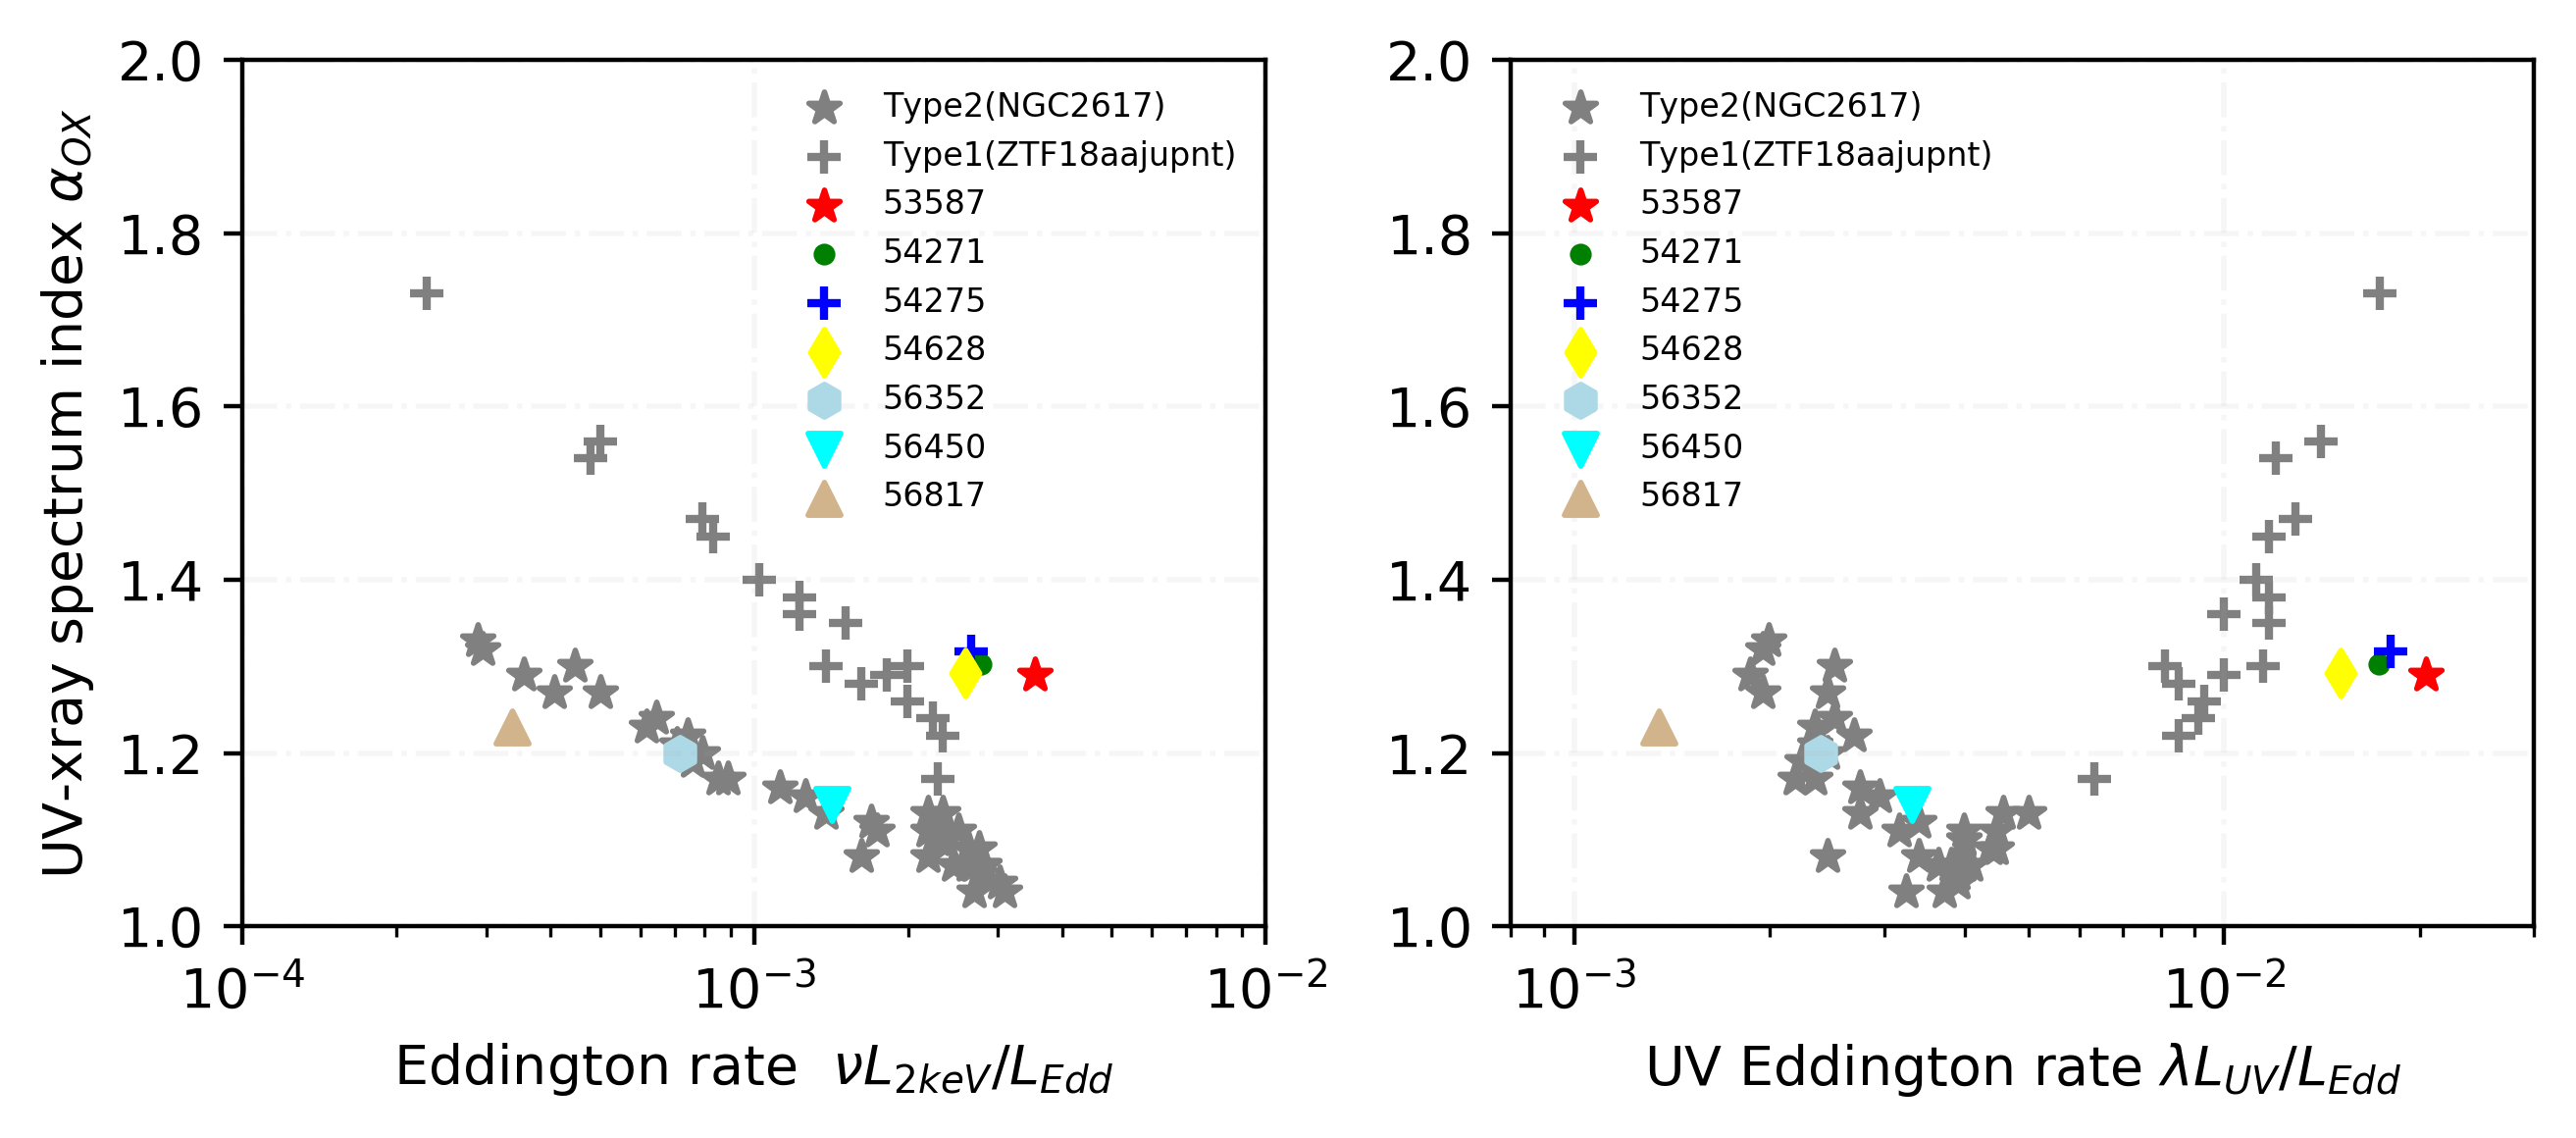

In [187]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
def isString(obj):
    return type(obj) is type('')

fig = plt.figure(figsize=(8/1.2,3),dpi=400)
ax1 = fig.add_subplot(121)


x1='log_lambda'
x2='log(Lbol/Ledd)'
x3='logLx'
x4='bhmasslog'
x5='logLUV'
x6='logLv2keV'
x7='LogLv2500'
x4_logm='bhmasslog'
x4_m='bhmass'
x_state='state'
x8='log(Luv/Ledd)'
y='alpha_ox'



'''for row in range(len(changing_look_quasars)):        
    px=changing_look_quasars.loc[row][x3]
    py=changing_look_quasars.loc[row][y]
    pmass=changing_look_quasars.loc[row][x4_m]
    pledd=1.26*10**38*pmass 
    pstate=changing_look_quasars.loc[row][x_state]
    
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(px) or isString(py):
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        if pstate=='bright':
            ax1.scatter(10**px/pledd,py,marker='^',color='black',label=pstate)
        else:
            ax1.scatter(10**px/pledd,py,marker='v',color='grey',label=pstate)'''
        

for row in range(len(NGC2617)):        
    px=NGC2617.loc[row][x3]#logLx
    py=NGC2617.loc[row][y]
    pmass=10**7.5
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax1.scatter(10**px/pledd,py,marker='*',color='grey',label='Type2(NGC2617)')

for row in range(len(ZTF18aajupnt)):        
    px=ZTF18aajupnt.loc[row][x3]#logLx
    py=ZTF18aajupnt.loc[row][y]
    pmass=10**6.4
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax1.scatter(10**px/pledd,py,marker='+',color='grey',label='Type1(ZTF18aajupnt)')
        

#F_2_10s=[1.14e-11,9.32e-12,7.88e-12,8.78e-12,9.83e-12,2.58e-12,8.26e-12,1.97e-12,1.5e-12,2.54e-12,1.89e-12,3.03e-12]
#for mjd,F_ in zip(mjds,F_2_10s):


marker_dict = dict(zip(xt_uw1, markers_pd[:len(xt_uw1)]))
color_dict = dict(zip(xt_uw1, colors_pd[:len(xt_uw1)]))
f_2keV=4.836e17 #Hz
F_2keV=np.array(xf_uw1_2keV)#\nuF\nu

alpha_ox=1-(np.log10(uf_uw1_2keV)-np.log10(F_2keV))/(np.log10(f_uw1)-np.log10(f_2keV))
uw1_rate=4*np.pi*D_cm.value**2*np.array(uf_uw1_2keV)/Ledd  
xray_rate=4*np.pi*D_cm.value**2*np.array(F_2keV)/Ledd
   
    #fig = plt.figure(figsize=(4,3),dpi=400)
    #ax = fig.add_subplot(111)
for i,j,k,xray_ in zip(xray_rate,alpha_ox,xt_uw1_2keV,np.array(xf_uw1_2keV)):
    m_=marker_dict[k]
    c_=color_dict[k]
    if k<57429:
        plt.scatter(x=i,y=j,marker=m_,color=c_,label=int(k))
        print(4*np.pi*D_cm.value**2*xray_)


        
        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.72),ncol=1,fontsize=6,loc='right',frameon=False)
       












ax2 = fig.add_subplot(122,sharey=ax1)

'''
for row in range(len(changing_look_quasars)):        
    px=changing_look_quasars.loc[row][x5]
    py=changing_look_quasars.loc[row][y]
    pmass=changing_look_quasars.loc[row][x4_m]
    pledd=1.26*10**38*pmass      
    pstate=changing_look_quasars.loc[row][x_state]
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(px) or isString(py):
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        if pstate=='bright':
            ax2.scatter(10**px/pledd,py,marker='^',color='grey',label=pstate)
        else:
            ax2.scatter(10**px/pledd,py,marker='v',color='black',label=pstate)'''

for row in range(len(NGC2617)):        
    px=NGC2617.loc[row][x8]#luv/ledd
    px_=10**NGC2617.loc[row][x5]    
    py=NGC2617.loc[row][y]
    pmass=10**7.5
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax2.scatter(10**px,py,marker='*',color='grey',label='Type2(NGC2617)')
        

for row in range(len(ZTF18aajupnt)):  
    px=ZTF18aajupnt.loc[row][x8]#luv/ledd
    px_=10**ZTF18aajupnt.loc[row][x5]
    py=ZTF18aajupnt.loc[row][y]
    pmass=10**6.4
    pledd=1.26*10**38*pmass        
    #x_=data.loc[row][xerr]
    #y_=data.loc[row][yerr]
    if isString(py) :
        continue
        #py=float(py.split('$<$')[1])        
        #plt.errorbar(px/pledd,py,yerr=0.0,marker='*',color='grey',label='lisl') 
    else:
        ax2.scatter(10**px,py,marker='+',color='grey',label='Type1(ZTF18aajupnt)')
        
print()


#F_2_10s=[1.14e-11,9.32e-12,7.88e-12,8.78e-12,9.83e-12,2.58e-12,8.26e-12,1.97e-12,1.5e-12,2.54e-12,1.89e-12,3.03e-12]
#for mjd,F_ in zip(mjds,F_2_10s):

marker_dict = dict(zip(xt_uw1, markers_pd[:len(xt_uw1)]))
color_dict = dict(zip(xt_uw1, colors_pd[:len(xt_uw1)]))

f_2keV=4.836e17 #Hz
F_2keV=np.array(xf_uw1_2keV)#\nuF\nu

alpha_ox=1-(np.log10(uf_uw1_2keV)-np.log10(F_2keV))/(np.log10(f_uw1)-np.log10(f_2keV))
uw1_rate=4*np.pi*D_cm.value**2*np.array(uf_uw1_2keV)/Ledd  
xray_rate=4*np.pi*D_cm.value**2*np.array(F_2keV)/Ledd   
    #fig = plt.figure(figsize=(4,3),dpi=400)
    #ax = fig.add_subplot(111)
    
    
for i,j,k,uv_ in zip(uw1_rate,alpha_ox,xt_uw1_2keV,np.array(uf_uw1_2keV)):
    m_=marker_dict[k]
    c_=color_dict[k]
    if k<57429:
        plt.scatter(x=i,y=j,marker=m_,color=c_,label=int(k))
        print(4*np.pi*D_cm.value**2*uv_)
        
        
        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.5, 0.72),ncol=1,fontsize=6,loc='right',frameon=False)

ax1.semilogx()
ax1.set_xlim(1e-4,1e-2)
ax1.set_ylim(1,2)
ax1.set_xlabel(r'Eddington rate  $\nu L_{2keV}/L_{Edd}$')
ax1.set_ylabel(r'UV-xray spectrum index $ \alpha_{OX} $')
ax1.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)


ax2.semilogx()
ax2.set_xlim(0.8e-3,3e-2)
ax2.set_ylim(1,2)

#plt.xlabel(r'UV Eddington rate $\lambda L_{2600\AA}/L_{Edd}$')
ax2.set_xlabel(r'UV Eddington rate $\lambda L_{UV}/L_{Edd}$')
#ax2.set_ylabel(r'UV-xray spectrum index $ \alpha_{OX} $')
ax2.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)

plt.subplots_adjust(hspace = 0.0,wspace = 0.0)
plt.tight_layout()
plt.style.use('default')
fig.savefig('Mrk1018_subplots_plus_2individuals_alpha_ox_L_x_Luv_rate.png',dpi=400)



# data_summarize_Mrk1018

In [190]:
data_summarize=pd.read_excel('/Users/brettlv/Downloads/mrk1018_alpha_ox.xlsx',)


In [257]:
data_summarize.columns

Index(['mjd', 'alpha_ox', 'L{1-3keV}/Ledd', 'Luvw1/Ledd', 'L_{1-3keV}',
       'Luvw1', 'F_{2-10keV}', 'L_{2-10keV}'],
      dtype='object')

## L2vsL2-10

0.8045196991746307 8.713002079520612


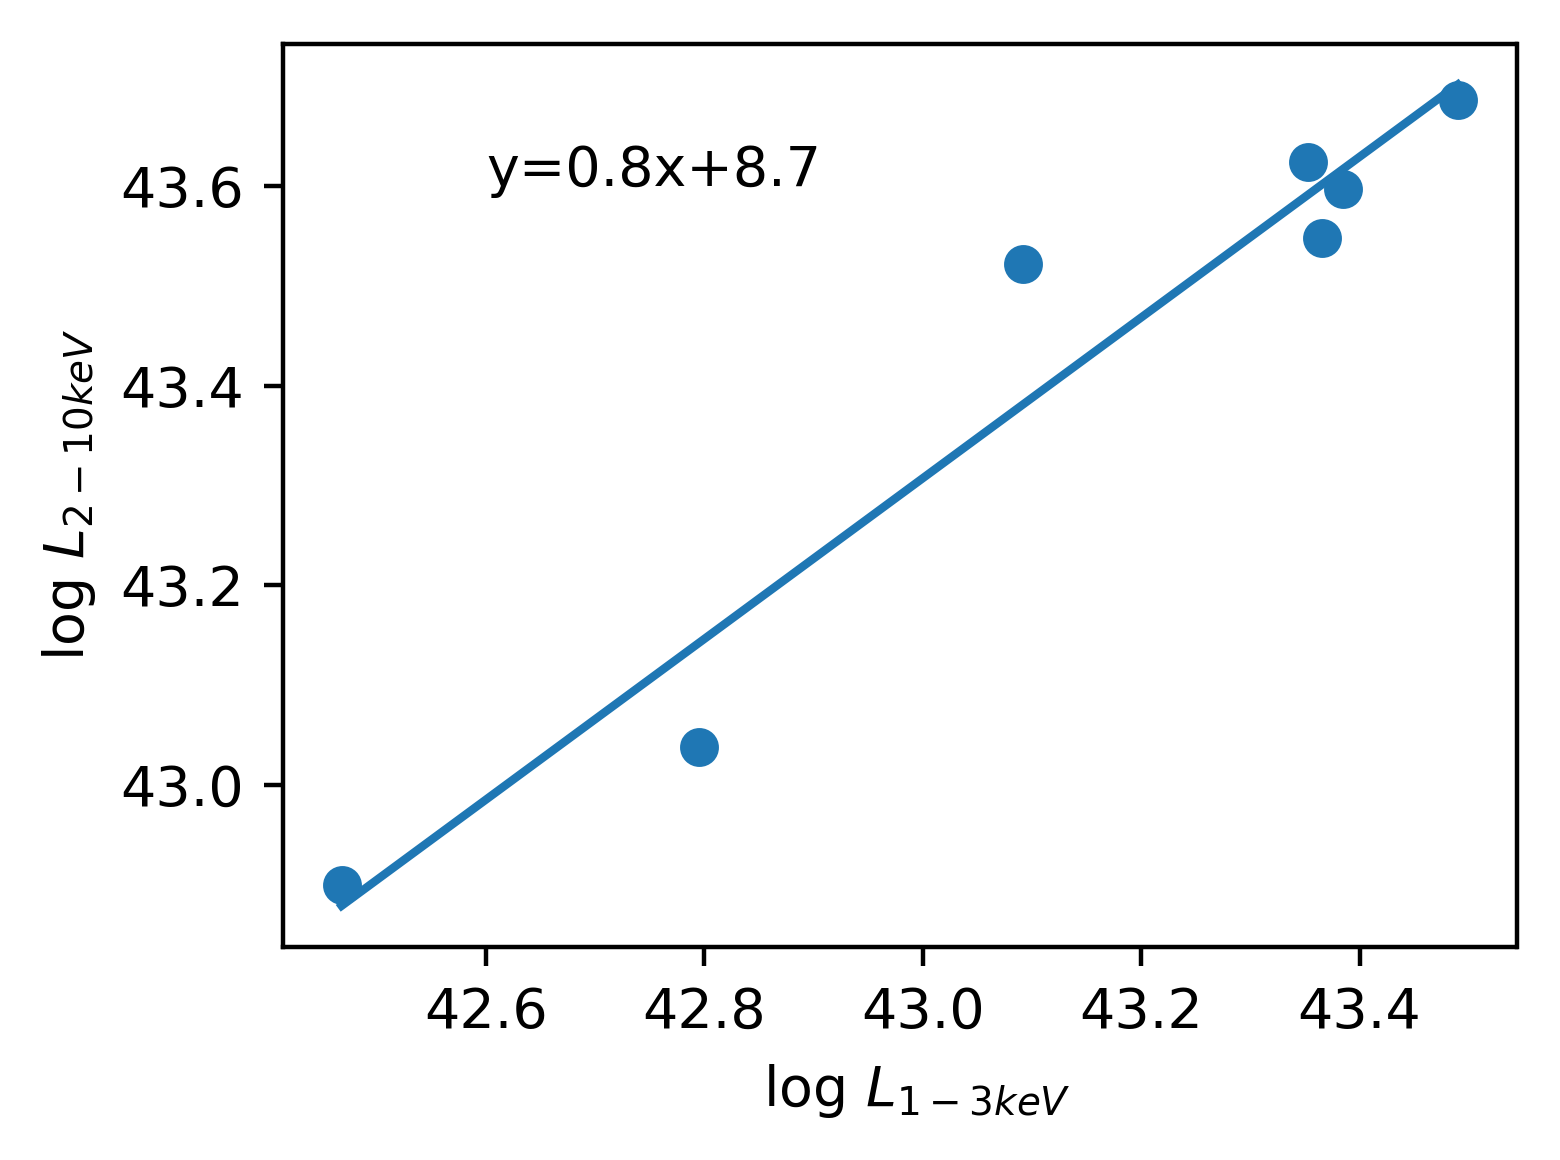

In [252]:
fig = plt.figure(figsize=(4,3),dpi=400)
ax1 = fig.add_subplot(111)
f_2keV=4.836e17 #Hz
x_=np.log10(data_summarize['L_{1-3keV}'])
y_=np.log10(data_summarize['L_{2-10keV}'])

ax1.scatter(x_,y_)
#ax1.semilogx()
#ax1.semilogy()
#ax1.set_xlim(0.8e43,2e44)

k,b=linear_calc(x_,y_)
print(k,b)
x2=np.linspace(min(x_),max(x_),10)
y2=k*x2+b
ax1.plot(x2,y2)
ax1.set_xlabel(r'  log $L_{1-3keV}$')
ax1.set_ylabel(r'log $L_{2-10keV}$')

ax1.text(42.6,43.6,'y=0.8x+8.7')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
#plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.5, 0.72),ncol=1,fontsize=6,loc='right',frameon=False)
ax1.grid(alpha=0.1,which='minor', linestyle='-.', linewidth=1)
plt.tight_layout()
plt.style.use('default')
fig.savefig('Mrk1018_L2vsL2-10.png',dpi=400)

#plt.show()

## L2vs2-10 Luv

0.7278512380248056 11.255772751370625
0.5600033677695864 18.888330223785267


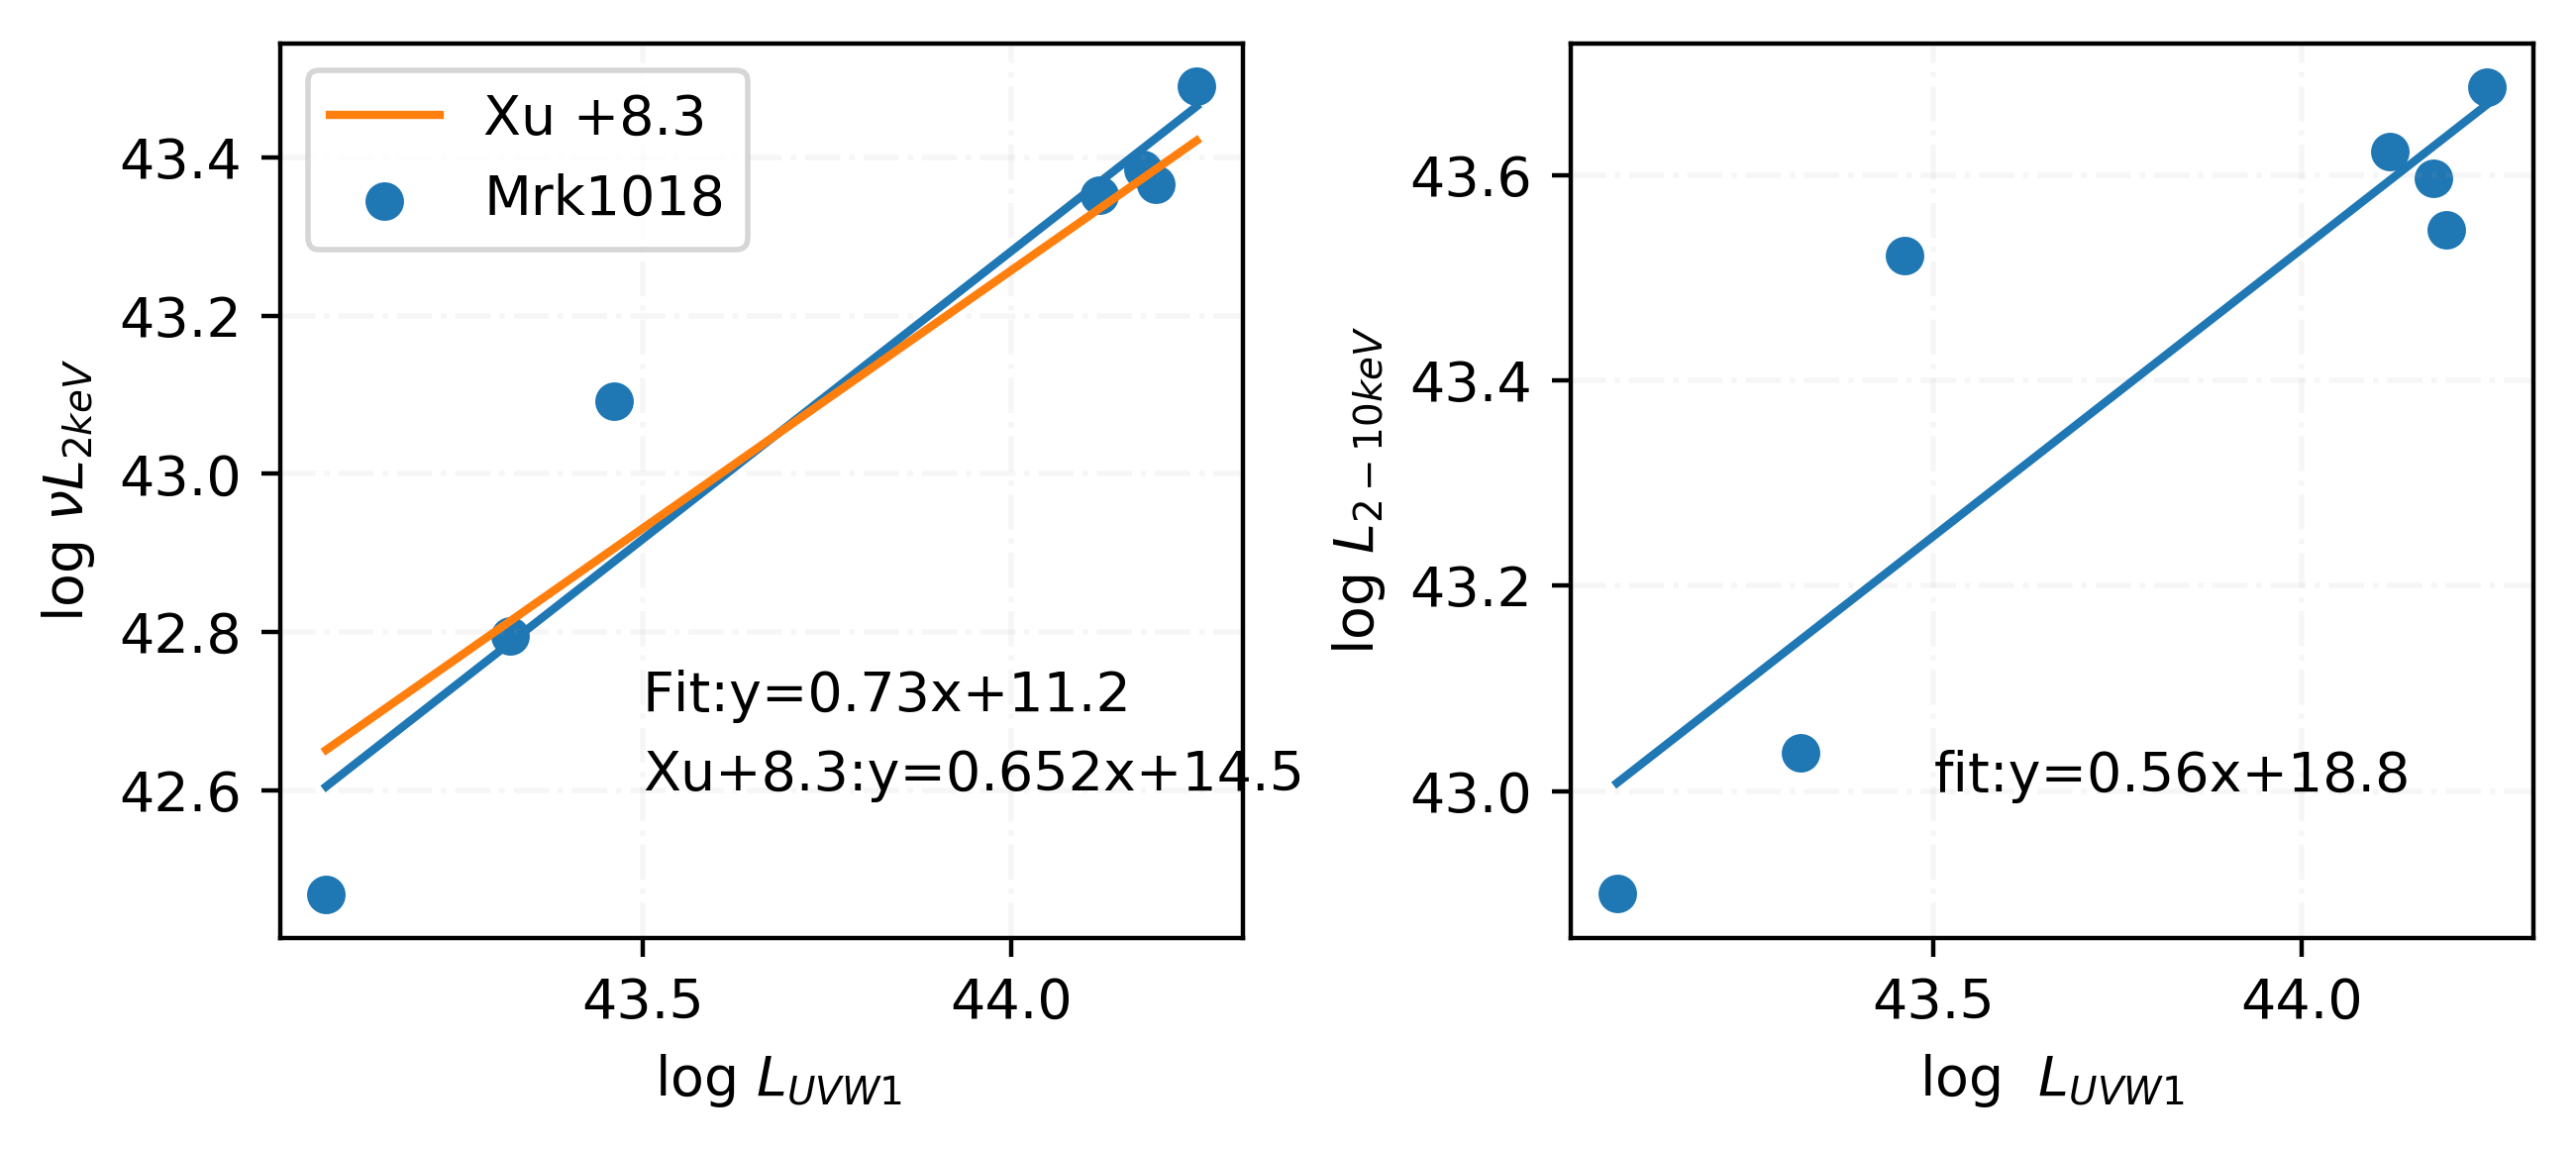

In [253]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
def isString(obj):
    return type(obj) is type('')

fig = plt.figure(figsize=(8/1.2,3),dpi=400)
ax1 = fig.add_subplot(121)
f_2keV=4.836e17 #Hz

#ax1.scatter(data_summarize['Luvw1'],data_summarize['L_{1-3keV}'])
x_=np.log10(data_summarize['Luvw1'])
y_=np.log10(data_summarize['L_{1-3keV}'])

ax1.scatter(x_,y_,label='Mrk1018')
#ax1.semilogx()
#ax1.semilogy()
#ax1.set_xlim(0.8e43,2e44)

k,b=linear_calc(x_,y_)
print(k,b)
x2=np.linspace(min(x_),max(x_),10)
y2=k*x2+b
y_xu=0.652*x2+6.269+8.3
ax1.plot(x2,y2,label='')
ax1.plot(x2,y_xu,label='Xu +8.3')

ax1.set_xlabel(r'  log $L_{UVW1}$')
ax1.set_ylabel(r'log $\nu L_{2keV} $')
ax1.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
ax1.legend()

ax1.text(43.5,42.7,'Fit:y=0.73x+11.2')
ax1.text(43.5,42.6,'Xu+8.3:y=0.652x+14.5')

ax2 = fig.add_subplot(122)
#ax2.scatter(data_summarize['Luvw1'],data_summarize['L_{2-10keV}'])
x_=np.log10(data_summarize['Luvw1'])
y_=np.log10(data_summarize['L_{2-10keV}'])

ax2.scatter(x_,y_)
#ax1.semilogx()
#ax1.semilogy()
#ax1.set_xlim(0.8e43,2e44)

k,b=linear_calc(x_,y_)
print(k,b)
x2=np.linspace(min(x_),max(x_),10)
y2=k*x2+b
ax2.plot(x2,y2)
        

#ax1.semilogx()
#ax1.semilogy()
#ax1.set_xlim(1e-4,1e-2)
#ax1.set_ylim(1,2)
ax2.set_xlabel(r'  log $L_{UVW1}$')
ax2.set_ylabel(r'log $\nu L_{2keV} $')
ax2.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)


#ax2.semilogx()
#ax2.semilogy()
#ax2.set_xlim(0.8e-3,3e-2)
#ax2.set_ylim(1,2)

#plt.xlabel(r'UV Eddington rate $\lambda L_{2600\AA}/L_{Edd}$')
ax2.set_xlabel(r'log  $L_{UVW1}$')
ax2.set_ylabel(r'log $L_{2-10keV} $')
ax2.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
ax2.text(43.5,43,'fit:y=0.56x+18.8')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
#plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.5, 0.72),ncol=1,fontsize=6,loc='right',frameon=False)


plt.subplots_adjust(hspace = 0.0,wspace = 0.0)
plt.tight_layout()
plt.style.use('default')
#plt.show()
fig.savefig('Mrk1018_subplots_Luv_L2vsL2-10.png',dpi=400)

In [ ]:
The slope of log Lν(2keV) −
log Lν(2500˚A)
relation we obtained in this work is 0.652, an intermediate value between the
slopes, ∼ 0.645 − 0.760 (Strateva et al. 2005; Lusso et al. 2010),

log Lν(2keV) = (0.652 ± 0.082) logLν(2500˚A)+ (6.269 ± 2.044),

## subplot

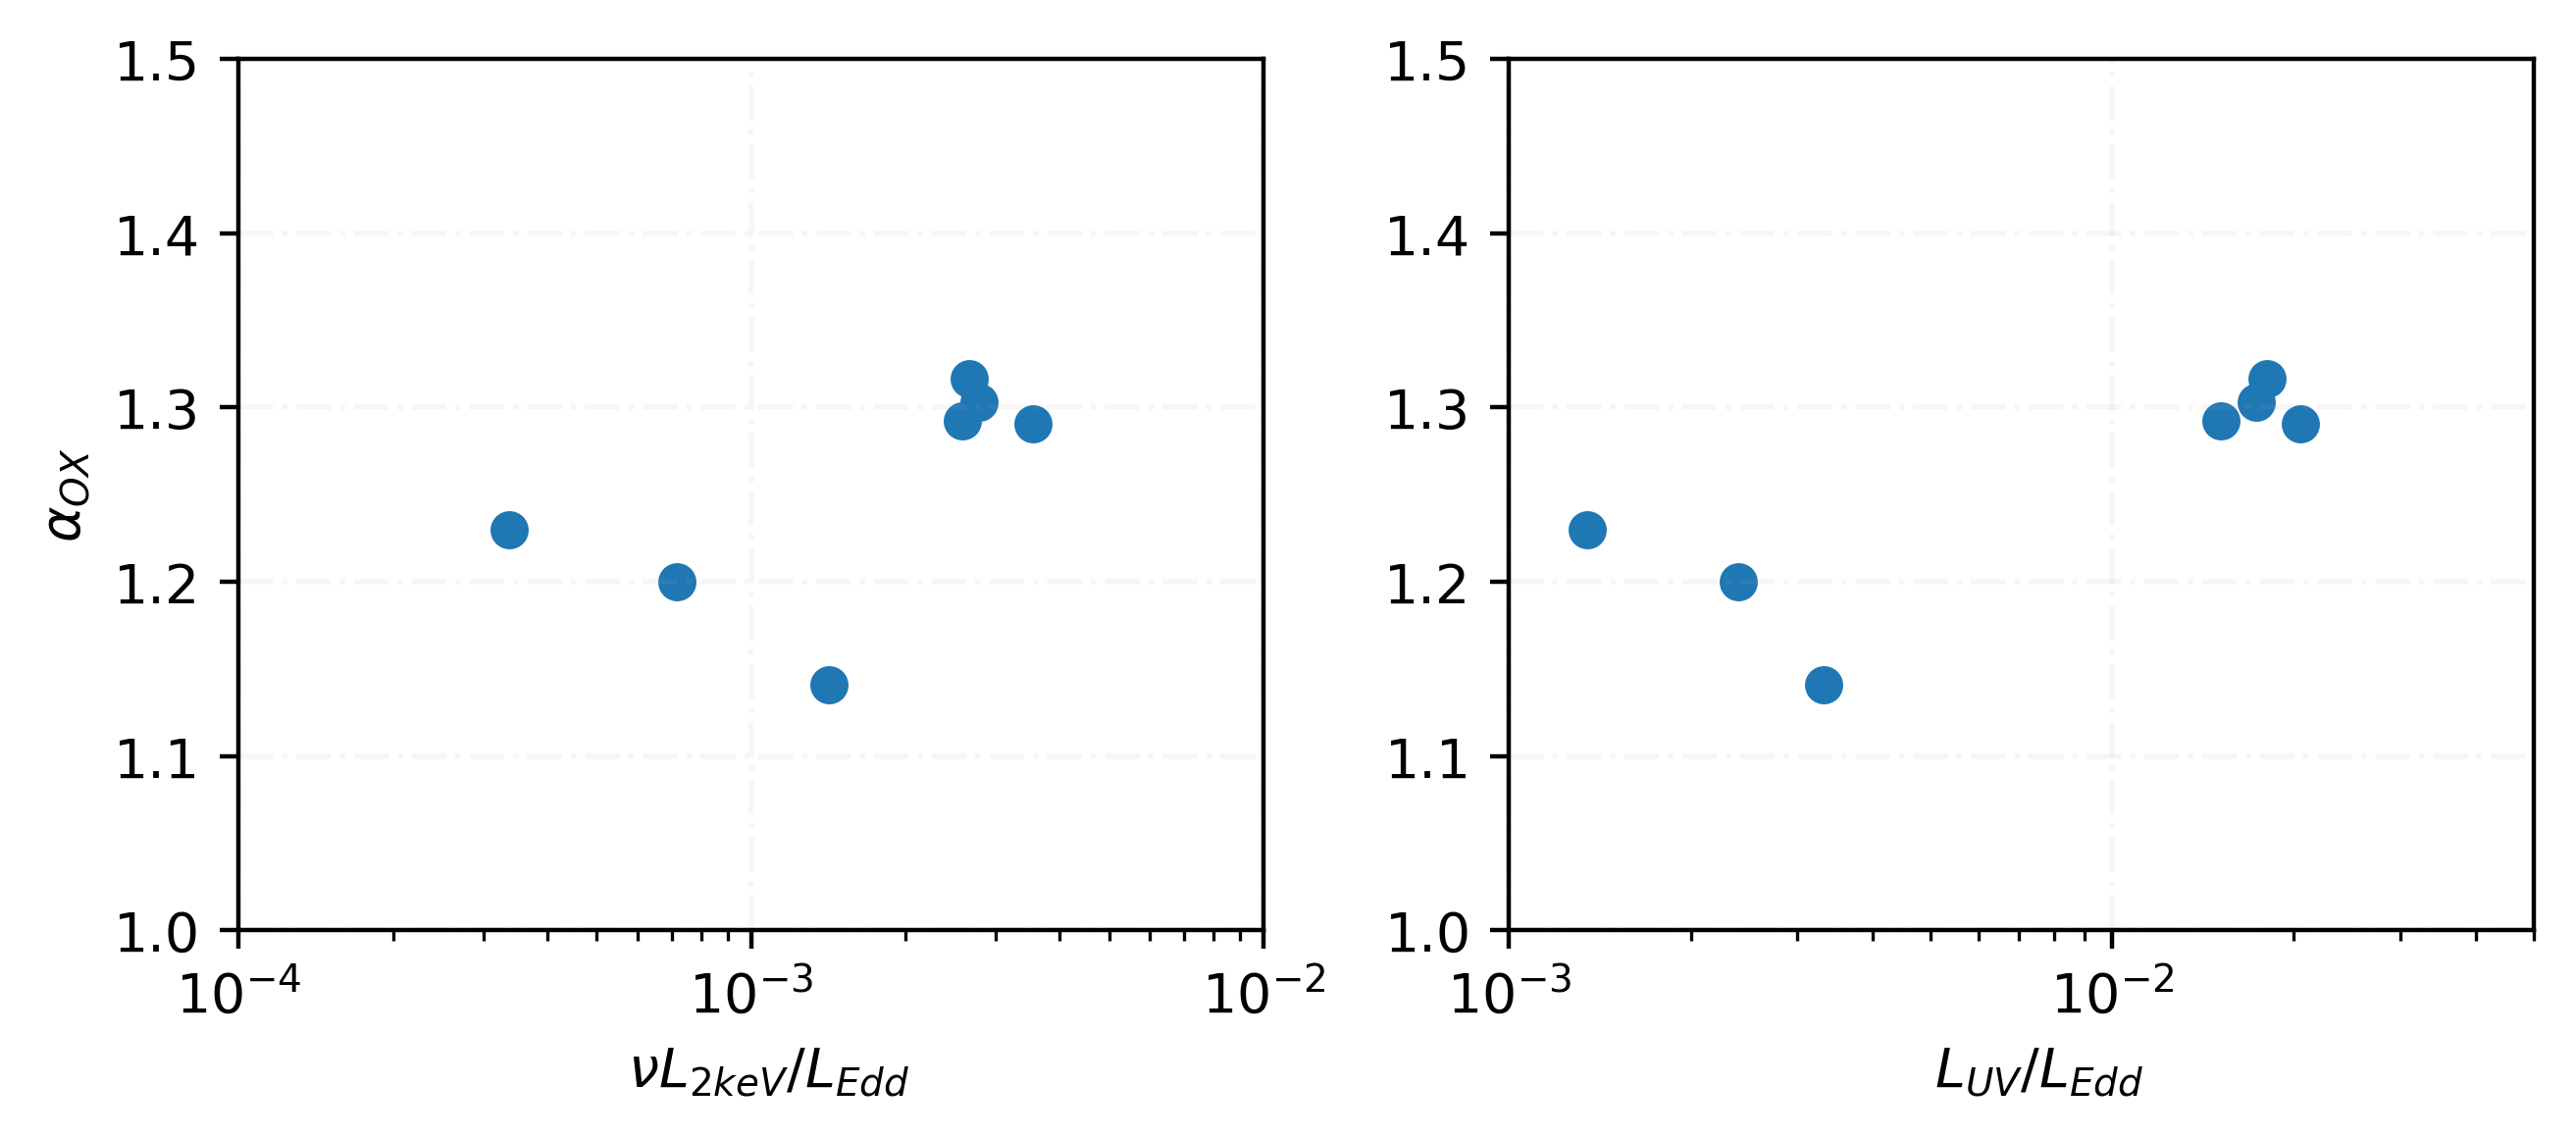

In [265]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
def isString(obj):
    return type(obj) is type('')

fig = plt.figure(figsize=(8/1.2,3),dpi=400)
ax1 = fig.add_subplot(121)
f_2keV=4.836e17 #Hz

ax1.scatter(data_summarize['L{1-3keV}/Ledd'],data_summarize['alpha_ox'])

ax2 = fig.add_subplot(122,sharey=ax1)
ax2.scatter(data_summarize['Luvw1/Ledd'],data_summarize['alpha_ox'])

        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
#plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.5, 0.72),ncol=1,fontsize=6,loc='right',frameon=False)

ax1.semilogx()
ax1.set_xlim(1e-4,1e-2)
ax1.set_ylim(1,1.5)
ax2.set_xlim(1e-3,5e-2)
ax2.set_ylim(1,1.5)


ax1.set_xlabel(r'  $\nu L_{2keV}/L_{Edd}$')
ax1.set_ylabel(r'$\alpha_{OX} $')
ax1.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)


ax2.semilogx()
#ax2.semilogy()
#ax2.set_xlim(0.8e-3,3e-2)
#ax2.set_ylim(1,2)

#plt.xlabel(r'UV Eddington rate $\lambda L_{2600\AA}/L_{Edd}$')
ax2.set_xlabel(r'  $L_{UV}/L_{Edd}$')
#ax2.set_ylabel(r'$\alpha_{OX} $')
ax2.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)

plt.subplots_adjust(hspace = 0.0,wspace = 0.0)
plt.tight_layout()
plt.style.use('default')
#plt.show()
fig.savefig('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/multi-band-data/Mrk1018_subplots_alpha_ox_L2vsUV.png',dpi=400)

In [ ]:
/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/multi-band-data

## subplot_alpha_ox L2vsL2-10keV/Ledd

In [260]:
data_summarize.columns

Index(['mjd', 'alpha_ox', 'L{1-3keV}/Ledd', 'Luvw1/Ledd', 'L_{1-3keV}',
       'Luvw1', 'F_{2-10keV}', 'L_{2-10keV}'],
      dtype='object')

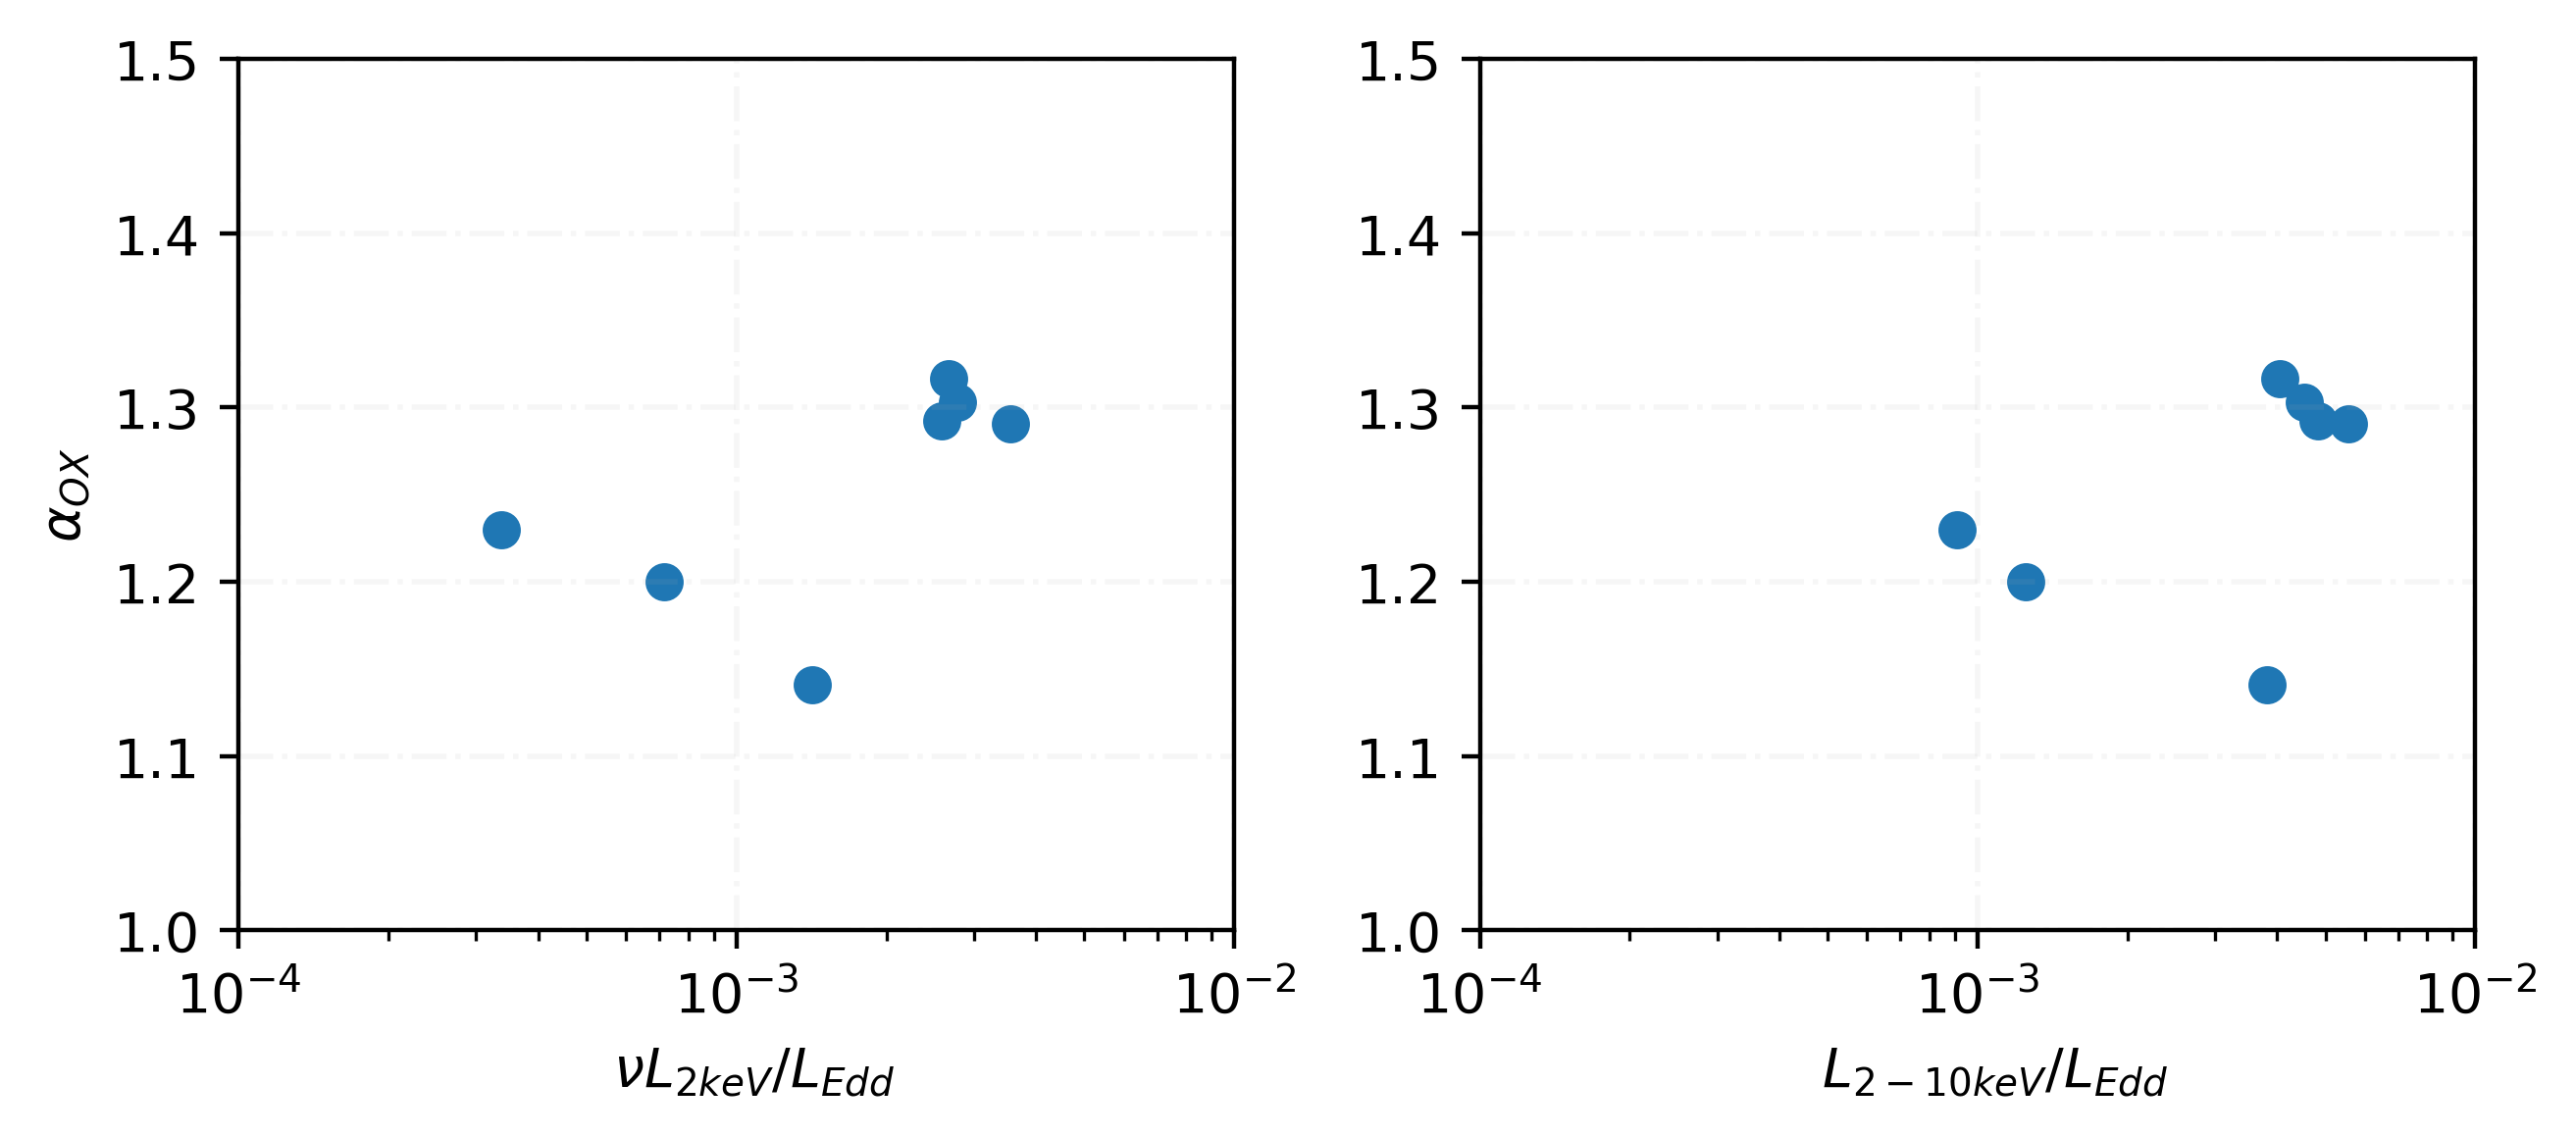

In [177]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
def isString(obj):
    return type(obj) is type('')

fig = plt.figure(figsize=(8/1.2,3),dpi=400)
ax1 = fig.add_subplot(121)
f_2keV=4.836e17 #Hz

ax1.scatter(data_summarize['Lx/Ledd'],data_summarize['alpha_ox'])

ax2 = fig.add_subplot(122,sharey=ax1)
ax2.scatter(data_summarize['L_{2-10keV}']/Ledd,data_summarize['alpha_ox'])

        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
#plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.5, 0.72),ncol=1,fontsize=6,loc='right',frameon=False)

ax1.semilogx()
#ax1.semilogy()
ax1.set_xlim(1e-4,1e-2)
ax1.set_ylim(1,1.5)
ax2.set_xlim(1e-4,1e-2)
ax2.set_ylim(1,1.5)

ax1.set_xlabel(r'  $\nu L_{2keV}/L_{Edd}$')
ax1.set_ylabel(r'$\alpha_{OX} $')
ax1.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)


ax2.semilogx()
#ax2.semilogy()
#ax2.set_xlim(0.8e-3,3e-2)
#ax2.set_ylim(1,2)

#plt.xlabel(r'UV Eddington rate $\lambda L_{2600\AA}/L_{Edd}$')
ax2.set_xlabel(r'  $L_{2-10keV}/L_{Edd}$')
#ax2.set_ylabel(r'$\alpha_{OX} $')
ax2.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)

plt.subplots_adjust(hspace = 0.0,wspace = 0.0)
plt.tight_layout()
plt.style.use('default')
#plt.show()
fig.savefig('Mrk1018_subplots_alpha_ox_L2vsL2-10.png',dpi=400)

In [ ]:
The best-fitting linear regression
line for 36 sources with the Eddingtong ratio Lbol/LEdd . 10−3
is αox = (−0.163 ± 0.070) log Lbol/LEdd + (0.185 ± 0.321).

## alpha_ox Lbol/Ledd

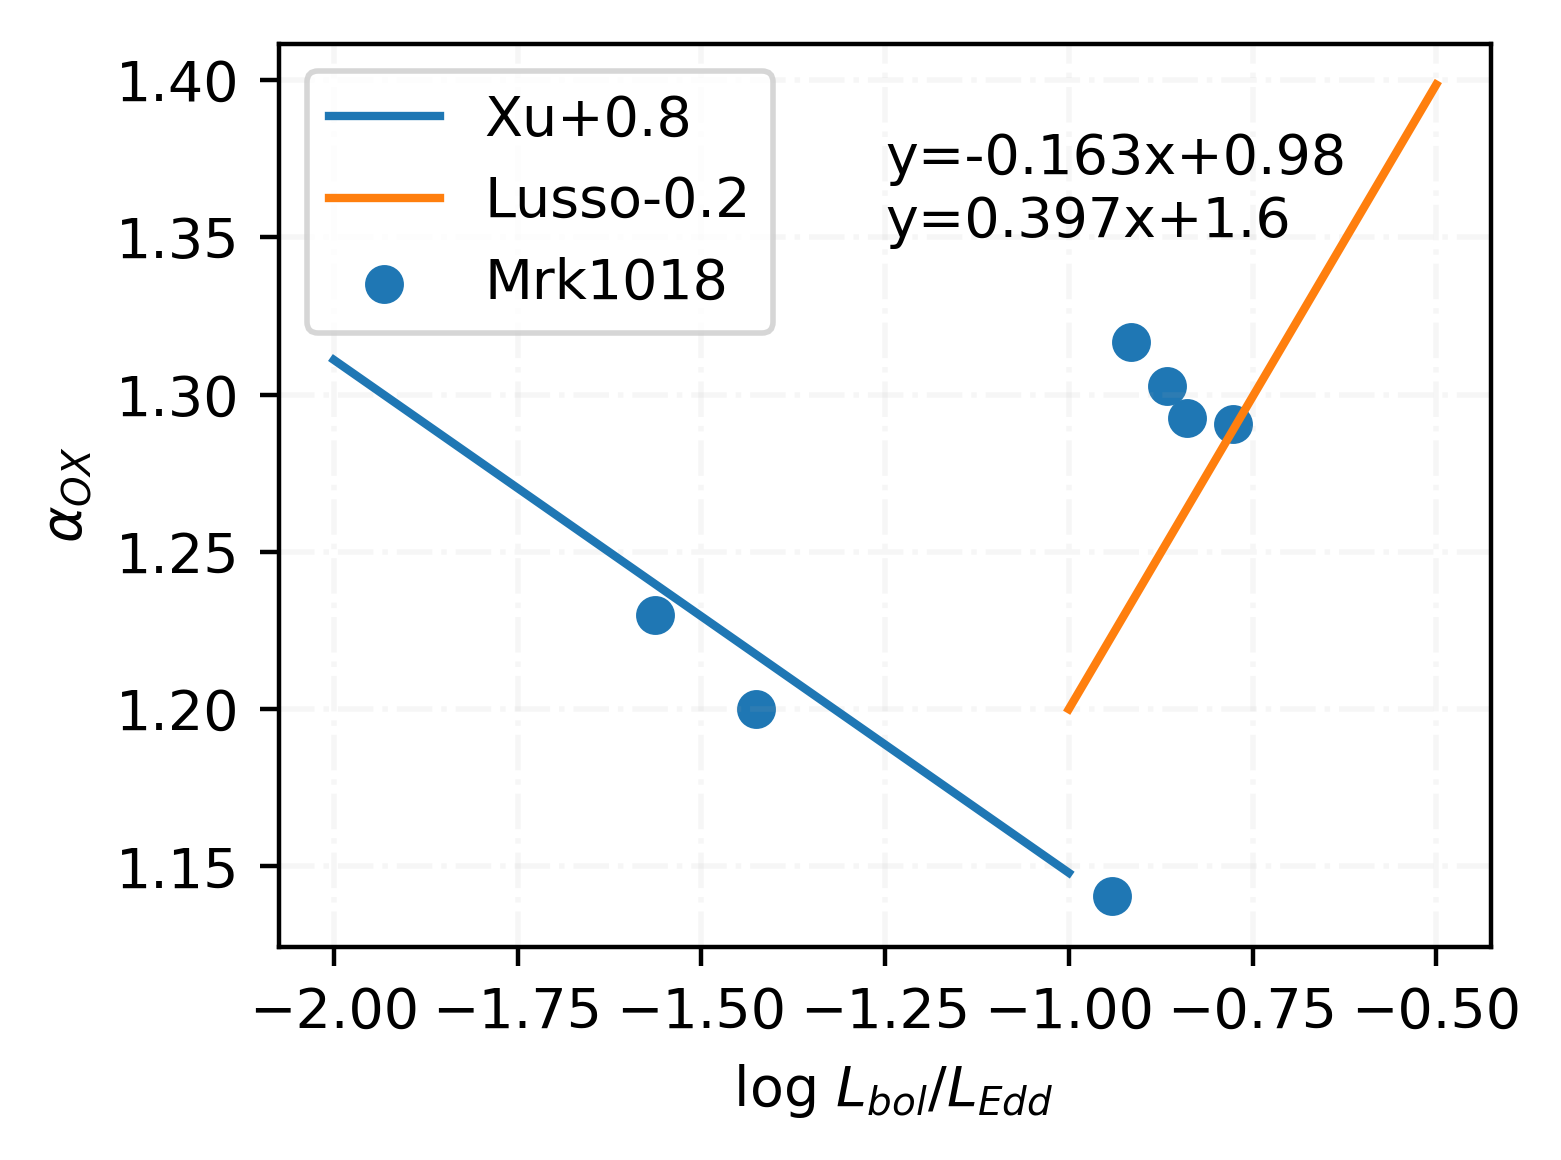

In [247]:
fig = plt.figure(figsize=(4,3),dpi=400)
ax1 = fig.add_subplot(111)
f_2keV=4.836e17 #Hz


x_=np.log10(30*data_summarize['L_{2-10keV}']/Ledd)
y_=data_summarize['alpha_ox']

#ax1.semilogx()
#ax1.semilogy()
#ax1.set_xlim(0.8e43,2e44)
#k,b=linear_calc(x_,y_)
#print(k,b)

x2=np.linspace(-2,-1,10)
yxu= -0.163*x2+0.185+0.8

x3=np.linspace(-1,-0.5,10)
yLusso=0.397*x3+1.797-0.2# Lusso 2010

ax1.scatter(x_,y_,label='Mrk1018')
ax1.plot(x2,yxu,label='Xu+0.8')
ax1.plot(x3,yLusso,label='Lusso-0.2')
ax1.legend()
#ax1.semilogx()
#ax1.semilogy()
#ax1.set_xlim(0.8e43,2e44)

ax1.set_xlabel(r' log $L_{bol}/L_{Edd}$')
ax1.set_ylabel(r'$\alpha_{OX}$')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
#plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.5, 0.72),ncol=1,fontsize=6,loc='right',frameon=False)


ax1.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
plt.style.use('default')

plt.text(-1.25,1.37,'y=-0.163x+0.98')
plt.text(-1.25,1.35,'y=0.397x+1.6')

fig.savefig('Mrk1018_alpha_ox_Lbol_Ledd.png',dpi=400)

#plt.show()

## alpha_ox vs Luv

0.10376904263910895 -3.2917731700463575


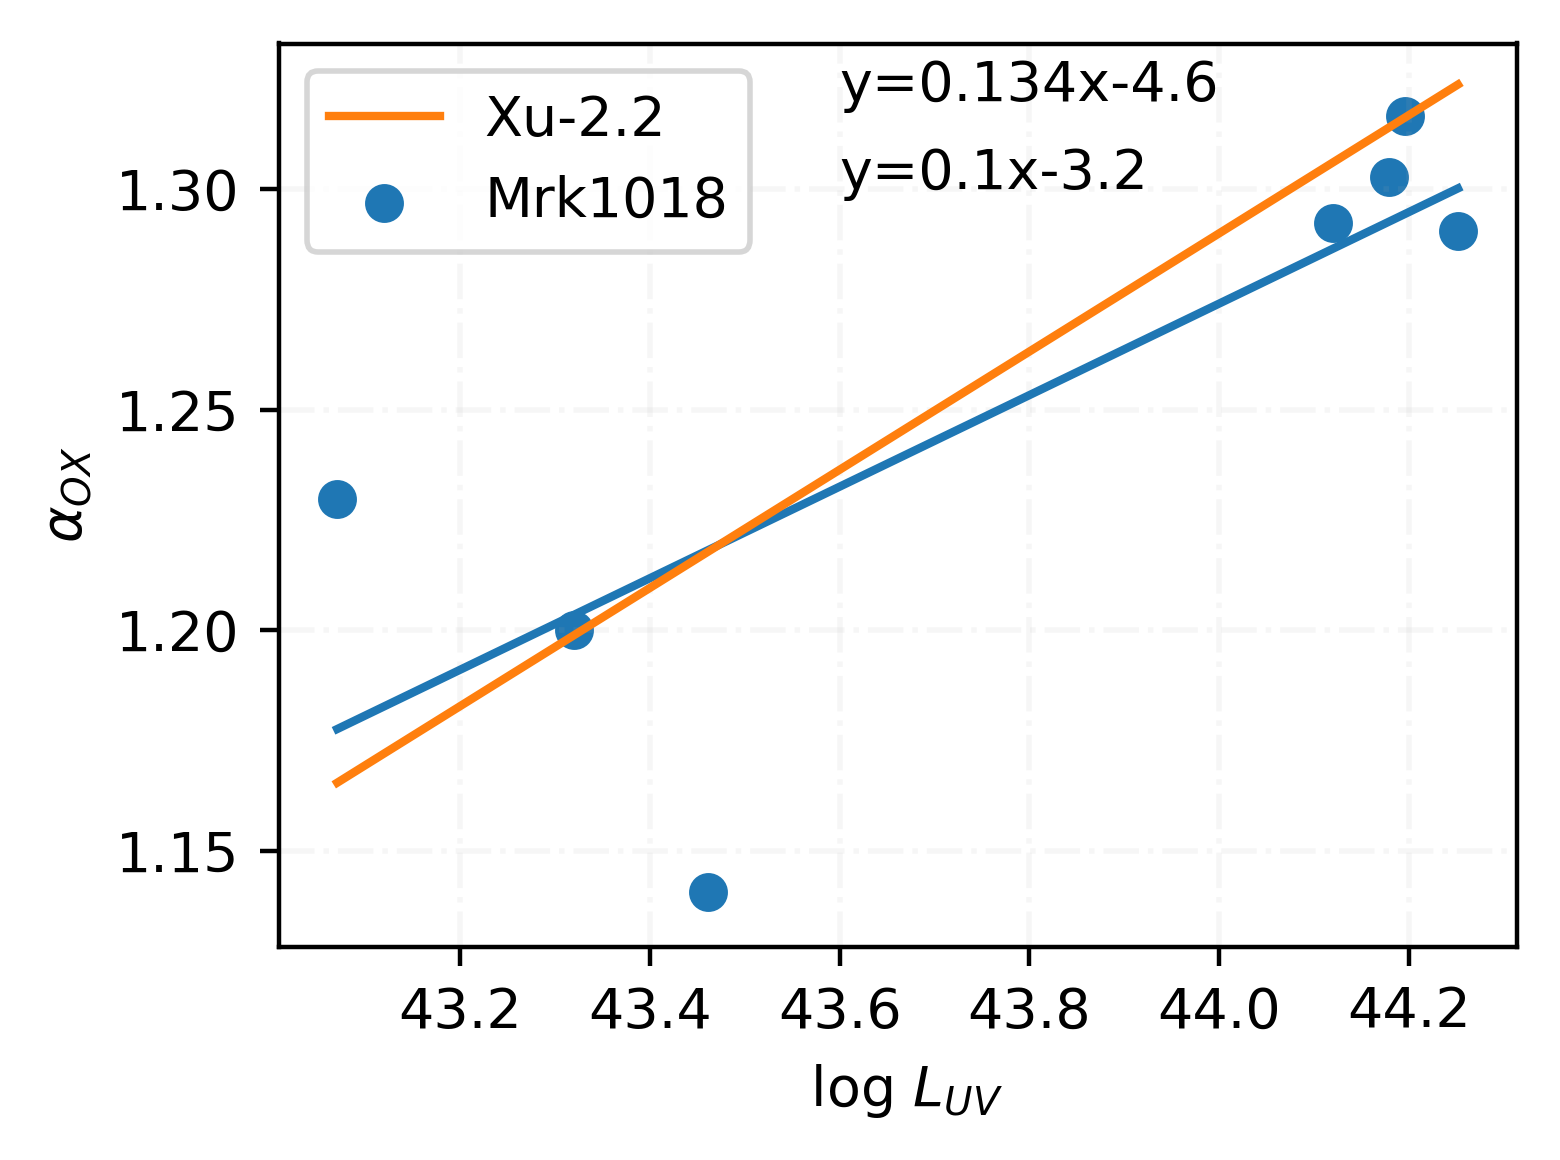

In [246]:
fig = plt.figure(figsize=(4,3),dpi=400)
ax1 = fig.add_subplot(111)
f_2keV=4.836e17 #Hz


x_=np.log10(data_summarize['Luvw1'])
y_=data_summarize['alpha_ox']

#ax1.semilogx()
#ax1.semilogy()
#ax1.set_xlim(0.8e43,2e44)
k,b=linear_calc(x_,y_)
print(k,b)

x2=np.linspace(min(x_),max(x_),10)
y2=k*x2+b
yxu= 0.134*x2-2.406-2.2
ax1.scatter(x_,y_,label='Mrk1018')
ax1.plot(x2,y2,label='')
ax1.plot(x2,yxu,label='Xu-2.2')
ax1.legend()
#ax1.semilogx()
#ax1.semilogy()
#ax1.set_xlim(0.8e43,2e44)

ax1.set_xlabel(r' log $L_{UV}$')
ax1.set_ylabel(r'$\alpha_{OX}$')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
#plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.5, 0.72),ncol=1,fontsize=6,loc='right',frameon=False)


ax1.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
plt.style.use('default')

plt.text(43.6,1.3,'y=0.1x-3.2')
plt.text(43.6,1.32,'y=0.134x-4.6')

fig.savefig('Mrk1018_Luv_alpha_ox.png',dpi=400)

#plt.show()

In [ ]:
αox = (0.134 ± 0.031) logLν(2500˚A)− (2.406 ± 0.785)

## alpha_ox vs L2

0.10258774161363053 -3.17189023972119


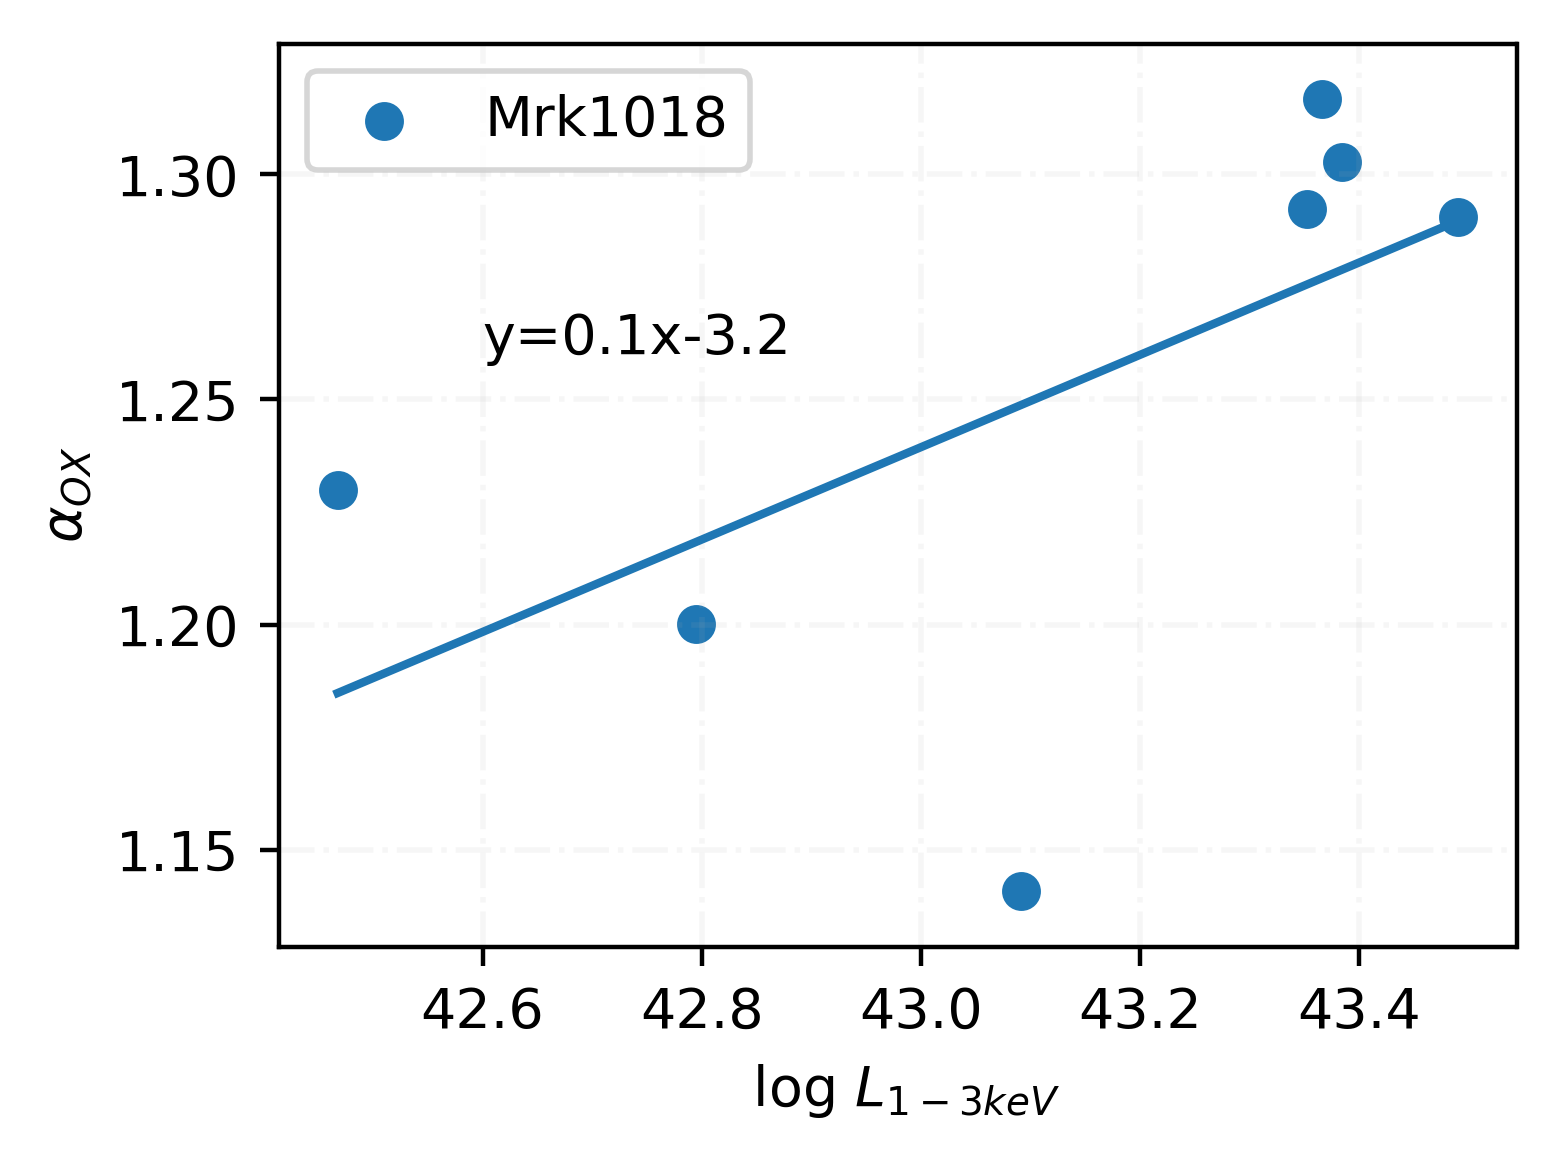

In [245]:
fig = plt.figure(figsize=(4,3),dpi=400)
ax1 = fig.add_subplot(111)
f_2keV=4.836e17 #Hz


x_=np.log10(data_summarize['L_{1-3keV}'])
y_=data_summarize['alpha_ox']

#ax1.semilogx()
#ax1.semilogy()
#ax1.set_xlim(0.8e43,2e44)
k,b=linear_calc(x_,y_)
print(k,b)

x2=np.linspace(min(x_),max(x_),10)
y2=k*x2+b

ax1.scatter(x_,y_,label='Mrk1018')
ax1.plot(x2,y2,label='')
ax1.legend()
#ax1.semilogx()
#ax1.semilogy()
#ax1.set_xlim(0.8e43,2e44)

ax1.set_xlabel(r' log $L_{1-3keV}$')
ax1.set_ylabel(r'$\alpha_{OX}$')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
#plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.5, 0.72),ncol=1,fontsize=6,loc='right',frameon=False)


ax1.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
plt.style.use('default')
fig.savefig('Mrk1018_Luv_alpha_ox.png',dpi=400)
#plt.show()
plt.text(42.6,1.26,'y=0.1x-3.2')
fig.savefig('Mrk1018_L2_alpha_ox.png',dpi=400)

#plt.show()

## Luv-L2keV

0.7278512380248056 11.255772751370625


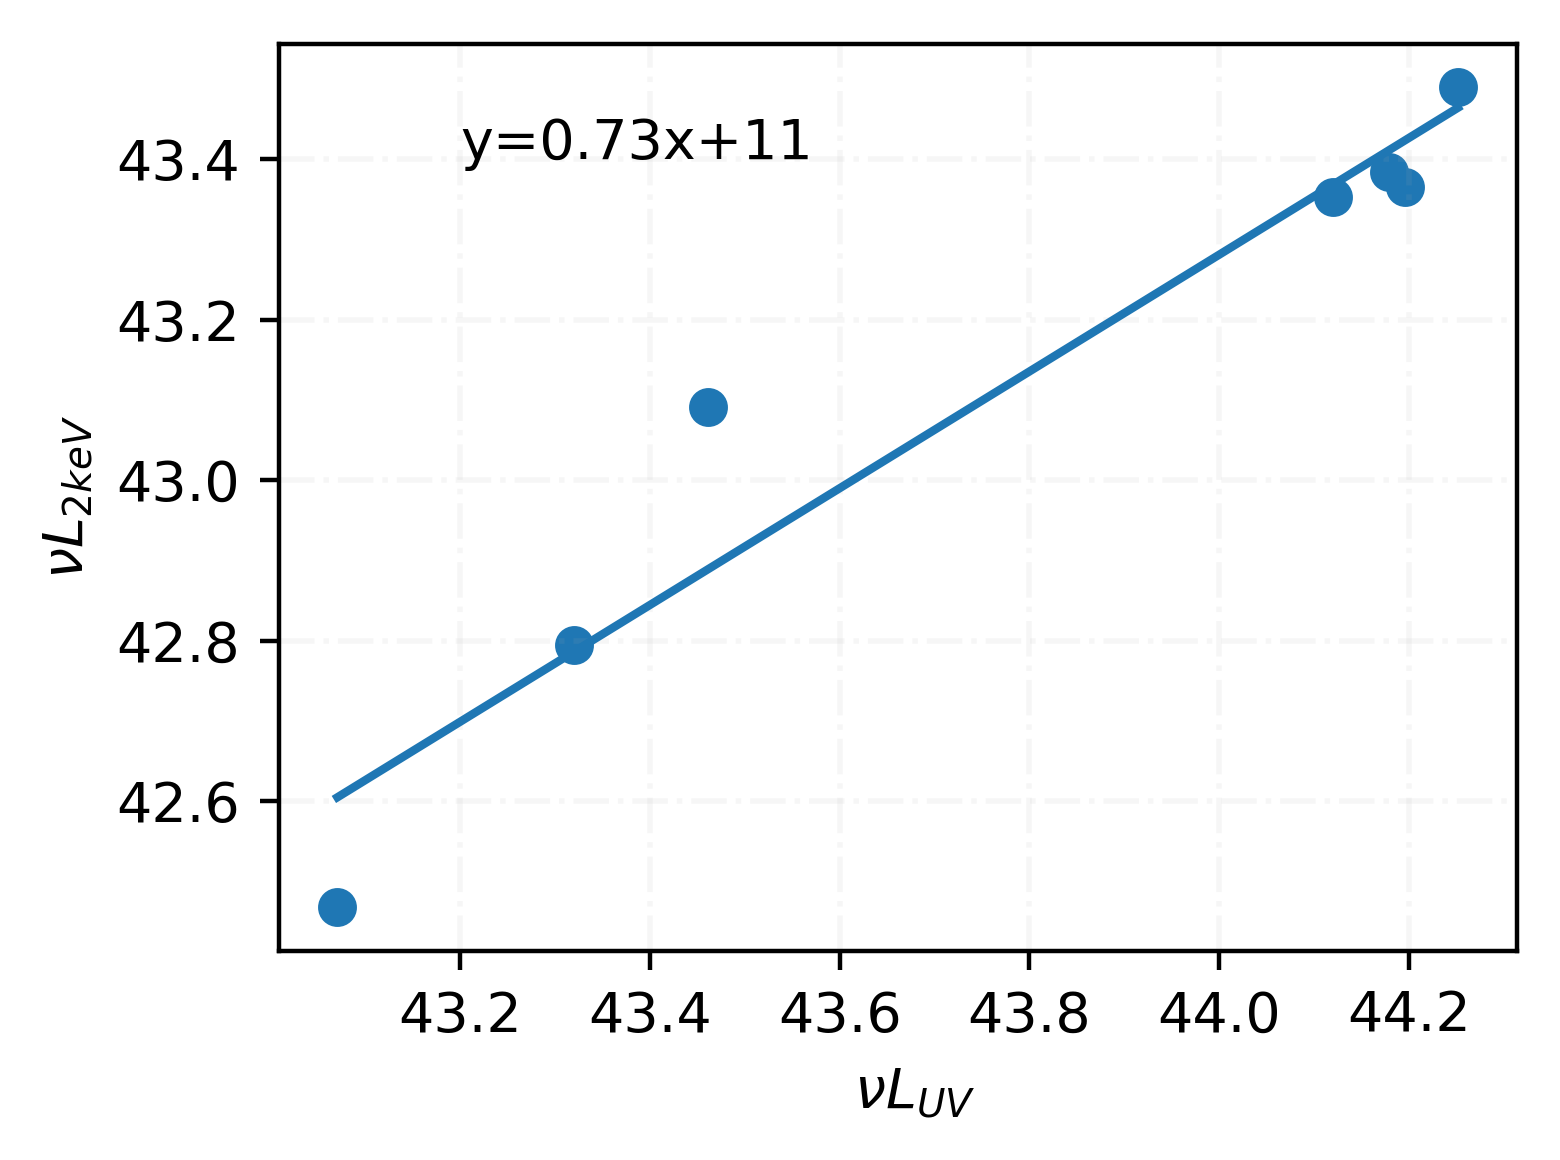

In [244]:
fig = plt.figure(figsize=(4,3),dpi=400)
ax1 = fig.add_subplot(111)
f_2keV=4.836e17 #Hz

x_=np.log10(data_summarize['Luvw1'])
y_=np.log10(data_summarize['L_{1-3keV}'])

ax1.scatter(x_,y_,label='Mrk1018')
#ax1.semilogx()
#ax1.semilogy()
#ax1.set_xlim(0.8e43,2e44)

k,b=linear_calc(x_,y_)
print(k,b)
x2=np.linspace(min(x_),max(x_),10)
y2=k*x2+b
ax1.plot(x2,y2)

ax1.set_xlabel(r'  $\nu L_{UV}$')
ax1.set_ylabel(r'$\nu L_{2keV}$')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))  

#plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.5, 0.72),ncol=1,fontsize=6,loc='right',frameon=False)


ax1.grid(alpha=0.1,which='major', linestyle='-.', linewidth=1)
plt.tight_layout()
plt.style.use('default')
plt.text(43.2,43.4,'y=0.73x+11')
fig.savefig('Mrk1018_Luv_L2.png',dpi=400)

#plt.show()

In [ ]:
radio_xray_sel1=pd.read_excel('/Users/brettlv/blog/IHEP_sync/paper/dataMrk1018/multi-band-data/Mrk1018radiolc_to_latex.xlsx',sheet_name='工作表5',index=None)
radio_xray_sel1['F_4.8GHz_rescale']=radio_xray_sel1['Fint']*(4.8/radio_xray_sel1['frequency'])**(-1*radio_xray_sel1['alpha_adopted'])
radio_xray_sel1['F_8.4GHz_rescale']=radio_xray_sel1['Fint']*(8.4/radio_xray_sel1['frequency'])**(-1*radio_xray_sel1['alpha_adopted'])
radio_xray_sel1['LR4.8']=4*np.pi*D_cm.value**2*radio_xray_sel1['F_4.8GHz_rescale']*10**-26*4.8*10**9
radio_xray_sel1['LR8.4']=4*np.pi*D_cm.value**2*radio_xray_sel1['F_8.4GHz_rescale']*10**-26*8.4*10**9
radio_xray_sel1['Lx']=4*np.pi*D_cm.value**2*radio_xray_sel1['F_2-10keV']

# vlass

In [1]:
import pyfits

In [2]:
vlass_mrk1018_path='/Users/brettlv/Downloads/mwa_paper/catalog/vlass/VLASS1.1.ql.T11t04.J020600+003000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
vlass_mrk1018_rms_path='/Users/brettlv/Downloads/mwa_paper/catalog/vlass/VLASS1.1.ql.T11t04.J020600+003000.10.2048.v1.I.iter1.image.pbcor.tt0.rms.subim.fits'
vlass_mrk1018=pyfits.open(vlass_mrk1018_path)
vlass_mrk1018_rms=pyfits.open(vlass_mrk1018_rms_path)

In [5]:
vlass_mrk1018.info()

Filename: /Users/brettlv/Downloads/mwa_paper/catalog/vlass/VLASS1.1.ql.T11t04.J020600+003000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     114   (3722, 3722, 1, 1)   float32   


In [15]:
vlass_mrk1018[0].data

array([[[[ 1.25638267e-04,  1.65593941e-04, -1.48762090e-04, ...,
          -2.13341074e-04, -2.15287771e-04,  1.84496730e-05],
         [ 1.93620188e-04,  1.42934741e-05, -1.65169477e-04, ...,
          -6.95715644e-05,  1.01364758e-05,  6.20874853e-05],
         [ 2.97535080e-05, -1.15370807e-04, -1.23180987e-04, ...,
           1.77767462e-04,  1.64517376e-04,  1.31548004e-04],
         ...,
         [-6.11010109e-05,  6.07054244e-05, -1.13950446e-04, ...,
           4.24518039e-05, -2.01117116e-04, -1.70004059e-04],
         [-1.89831801e-04,  1.07242435e-04,  1.29249502e-05, ...,
           6.79490186e-05, -7.48668172e-05, -1.39944474e-04],
         [-1.67409438e-04,  3.32240743e-05,  5.89482806e-05, ...,
           7.31423861e-05,  4.31968838e-05,  3.45445915e-05]]]],
      dtype=float32)

In [6]:
vlass_mrk1018_rms.info()

Filename: /Users/brettlv/Downloads/mwa_paper/catalog/vlass/VLASS1.1.ql.T11t04.J020600+003000.10.2048.v1.I.iter1.image.pbcor.tt0.rms.subim.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     122   (3722, 3722, 1, 1)   float32   


In [13]:
vlass_mrk1018_rms[0].data.shape

(1, 1, 3722, 3722)

In [14]:
vlass_mrk1018[0].header

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                 3722                                                  
NAXIS2  =                 3722                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   7.568945487340E-04                                                  
BMIN    =   6.171148353153E-04                                                  
BPA     =  -5.689941406250E+